### Import Libraries

In [1]:
# General Libraries
import re
import time
import json
import pickle
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# Visualizations
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,  
                              GradientBoostingClassifier)
from sklearn.model_selection import cross_validate
from sklearn.metrics import (ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score)
from sklearn.ensemble import IsolationForest

# Imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (TomekLinks, NearMiss, AllKNN,
                                     EditedNearestNeighbours, 
                                     RepeatedEditedNearestNeighbours) 
from imblearn.combine import SMOTETomek, SMOTEENN

# SHAP
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

# Model deployment
from flask import Flask
import streamlit as st

In [2]:
df = pd.read_csv('Company_Bankruptcy.csv')
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [3]:
list(df.columns)

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

In [4]:
columns_to_maintain = ['Bankrupt?',
                       ' ROA(C) before interest and depreciation before interest',
                       ' Operating Gross Margin',
                       ' Non-industry income and expenditure/revenue',
                       ' Operating Expense Rate',
                       ' Research and development expense rate',
                       ' Cash flow rate',
                       ' Interest-bearing debt interest rate',
                       ' Tax rate (A)',
                       ' Net Value Per Share (C)',
                       ' Persistent EPS in the Last Four Seasons',
                       ' Cash Flow Per Share',
                       ' Revenue Per Share (Yuan ¥)', 
                       ' Continuous Net Profit Growth Rate',
                       ' Net Value Growth Rate',
                       ' Total Asset Growth Rate',
                       ' Cash Reinvestment %',
                       ' Current Ratio',
                       ' Total debt/Total net worth',
                       ' Debt ratio %',
                       ' Net worth/Assets',
                       ' Long-term fund suitability ratio (A)',
                       ' Operating profit/Paid-in capital',
                       ' Inventory and accounts receivable/Net value',
                       ' Total Asset Turnover',
                       ' Accounts Receivable Turnover',
                       ' Current Assets/Total Assets',
                       ' Cash/Total Assets',
                       ' Cash/Current Liability',
                       ' Operating Funds to Liability',
                       ' Current Liabilities/Liability',
                       ' Working Capital/Equity',
                       ' Current Liabilities/Equity',
                       ' Long-term Liability to Current Assets',
                       ' Total income/Total expense',
                       ' Working capitcal Turnover Rate',
                       ' Cash Flow to Sales',
                       ' Cash Flow to Total Assets',
                       ' Cash Flow to Liability',
                       ' CFO to Assets',
                       ' Cash Flow to Equity',
                       ' Liability-Assets Flag',
                       ' Net Income to Total Assets',
                       ' Gross Profit to Sales',
                       " Net Income to Stockholder's Equity",
                       ' Liability to Equity',
                       ' Interest Coverage Ratio (Interest expense to EBIT)',
                       ' Net Income Flag',
                       ' Equity to Liability']       

### Data Cleaning and Processing

In [5]:
df = df[columns_to_maintain]
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                 0.601457                                      0.302646   
1                 0.610235                                      0.303556   
2                 0.601450                                      0.302035   
3                 0.583541                                      0.303350   
4                 0.598783                                      0.303475   

    Operating Expense Rate   Research and development expense rate  \
0             1.256969e-04                                     0.0   
1             2.897851e-04                                     0.0   
2             2.361297e-04                              25500000.0   
3             1.078888e-04                                     0.0   
4             7.890000e+09                                     0.0   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.458143                              0.000725            0.0   
1         0.461867                              0.000647            0.0   
2         0.458521                              0.000790            0.0   
3         0.465705                              0.000449            0.0   
4         0.462746                              0.000686            0.0   

    Net Value Per Share (C)  ...   CFO to Assets   Cash Flow to Equity  \
0                  0.147950  ...        0.520382              0.312905   
1                  0.182251  ...        0.567101              0.314163   
2                  0.193713  ...        0.538491              0.314515   
3                  0.154187  ...        0.604105              0.302382   
4                  0.167502  ...        0.578469              0.311567   

    Liability-Assets Flag   Net Income to Total Assets  \
0                       0                     0.716845   
1                       0                     0.795297   
2                       0                     0.774670   
3                       0                     0.739555   
4                       0                     0.795016   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                0.601453                             0.827890   
1                0.610237                             0.839969   
2                0.601449                             0.836774   
3                0.583538                             0.834697   
4                0.598782                             0.839973   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0              0.290202                                           0.564050     
1              0.283846                                           0.570175     
2              0.290189                                           0.563706     
3              0.281721                                           0.564663     
4              0.278514                                           0.575617     

    Net Income Flag   Equity to Liability  
0                 1              0.016469  
1                 1              0.020794  
2                 1              0.016474  
3                 1              0.023982  
4                 1              0.035490  

[5 rows x 49 columns]

#### Outliers Removal

In [6]:
# initialize baseline
iso=IsolationForest(random_state=143)
iso.fit(df)

# prediction of outliers is based on contamination level
y_pred_IF = iso.fit_predict(df)
IF_scores = iso.score_samples(df)

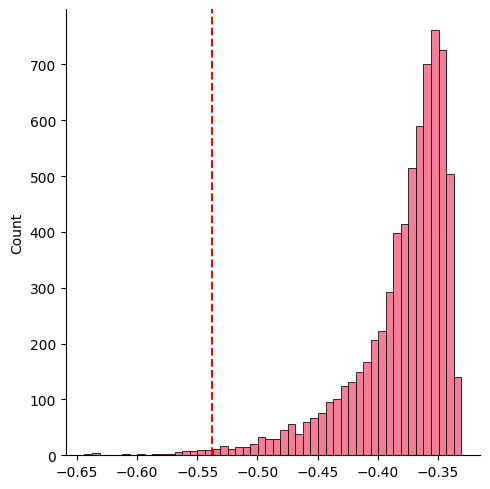

In [7]:
sns.displot(IF_scores, bins=50, color="#F25278")
plt.axvline(-0.538, linestyle='--', color='r')
plt.show()

In [8]:
y_pred_IF = (IF_scores > -0.538) * 2 - 1
df['IF_score'] = y_pred_IF
df_IF = df[df['IF_score'] == -1]
df_IF

Bankrupt?   ROA(C) before interest and depreciation before interest  \
56            1                                           0.066933          
379           1                                           0.453956          
427           1                                           0.311315          
576           1                                           0.401355          
1026          1                                           0.433871          
...         ...                                                ...          
6018          0                                           0.709648          
6358          0                                           0.413543          
6610          0                                           1.000000          
6641          1                                           0.337640          
6642          1                                           0.340028          

       Operating Gross Margin   Non-industry income and expenditure/revenue  \
56                   0.601861                                      0.302760   
379                  0.665151                                      0.272989   
427                  0.598293                                      0.302381   
576                  0.599173                                      0.302907   
1026                 0.595367                                      0.303237   
...                       ...                                           ...   
6018                 0.610776                                      0.306172   
6358                 0.596823                                      0.303563   
6610                 0.640684                                      0.303516   
6641                 0.590842                                      0.302953   
6642                 0.581466                                      0.302857   

       Operating Expense Rate   Research and development expense rate  \
56               2.766025e-04                            1.150000e+08   
379              3.824214e-03                            0.000000e+00   
427              5.338937e-04                            0.000000e+00   
576              1.938068e-04                            2.700000e+09   
1026             7.910000e+09                            2.000000e+09   
...                       ...                                     ...   
6018             1.344852e-04                            5.180000e+09   
6358             1.304380e-04                            1.190000e+08   
6610             2.164715e-04                            0.000000e+00   
6641             5.530000e+09                            0.000000e+00   
6642             4.027619e-04                            0.000000e+00   

       Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
56           0.458264                          3.990399e-04       0.000000   
379          0.461745                          3.640364e-04       0.000000   
427          0.465179                          4.090409e-04       0.000000   
576          0.459601                          7.830783e-04       0.000000   
1026         0.466418                          5.740574e-04       0.000000   
...               ...                                   ...            ...   
6018         0.462280                          7.900000e+08       0.218747   
6358         0.460052                          2.000200e-04       0.000000   
6610         0.476512                          0.000000e+00       0.252758   
6641         0.465222                          2.760276e-04       0.000000   
6642         0.457965                          3.820382e-04       0.000000   

       Net Value Per Share (C)  ...   Cash Flow to Equity  \
56                    0.120012  ...              0.240450   
379                   0.144073  ...              0.314155   
427                   0.126080  ...              0.202312   
576                   0.146854  ...              0.317354   
1026         

In [9]:
iso_in = df[df['IF_score'] == 1].index
df = df.loc[iso_in].reset_index(drop=True)
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6751          0                                           0.493687          
6752          0                                           0.475162          
6753          0                                           0.472725          
6754          0                                           0.506264          
6755          0                                           0.493053          

       Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                    0.601457                                      0.302646   
1                    0.610235                                      0.303556   
2                    0.601450                                      0.302035   
3                    0.583541                                      0.303350   
4                    0.598783                                      0.303475   
...                       ...                                           ...   
6751                 0.604455                                      0.303510   
6752                 0.598308                                      0.303520   
6753                 0.610444                                      0.303512   
6754                 0.607850                                      0.303498   
6755                 0.627409                                      0.313415   

       Operating Expense Rate   Research and development expense rate  \
0                1.256969e-04                            0.000000e+00   
1                2.897851e-04                            0.000000e+00   
2                2.361297e-04                            2.550000e+07   
3                1.078888e-04                            0.000000e+00   
4                7.890000e+09                            0.000000e+00   
...                       ...                                     ...   
6751             1.510213e-04                            4.500000e+09   
6752             5.220000e+09                            1.440000e+09   
6753             2.509312e-04                            1.039086e-04   
6754             1.236154e-04                            2.510000e+09   
6755             1.431695e-03                            0.000000e+00   

       Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0            0.458143                          7.250725e-04       0.000000   
1            0.461867                          6.470647e-04       0.000000   
2            0.458521                          7.900790e-04       0.000000   
3            0.465705                          4.490449e-04       0.000000   
4            0.462746                          6.860686e-04       0.000000   
...               ...                                   ...            ...   
6751         0.463734                          1.790179e-04       0.113372   
6752         0.461978                          2.370237e-04       0.371596   
6753         0.472189                          0.000000e+00       0.490839   
6754         0.476123                          2.110211e-04       0.181294   
6755         0.427721                          5.900000e+08       0.000000   

       Net Value Per Share (C)  ...   Cash Flow to Equity  \
0                     0.147950  ...              0.312905   
1                     0.182251  ...              0.314163   
2                     0.193713  ...              0.314515   
3                     0.154187  ...              0.302382   
4            

** Drop IF_Score Column

### EDA

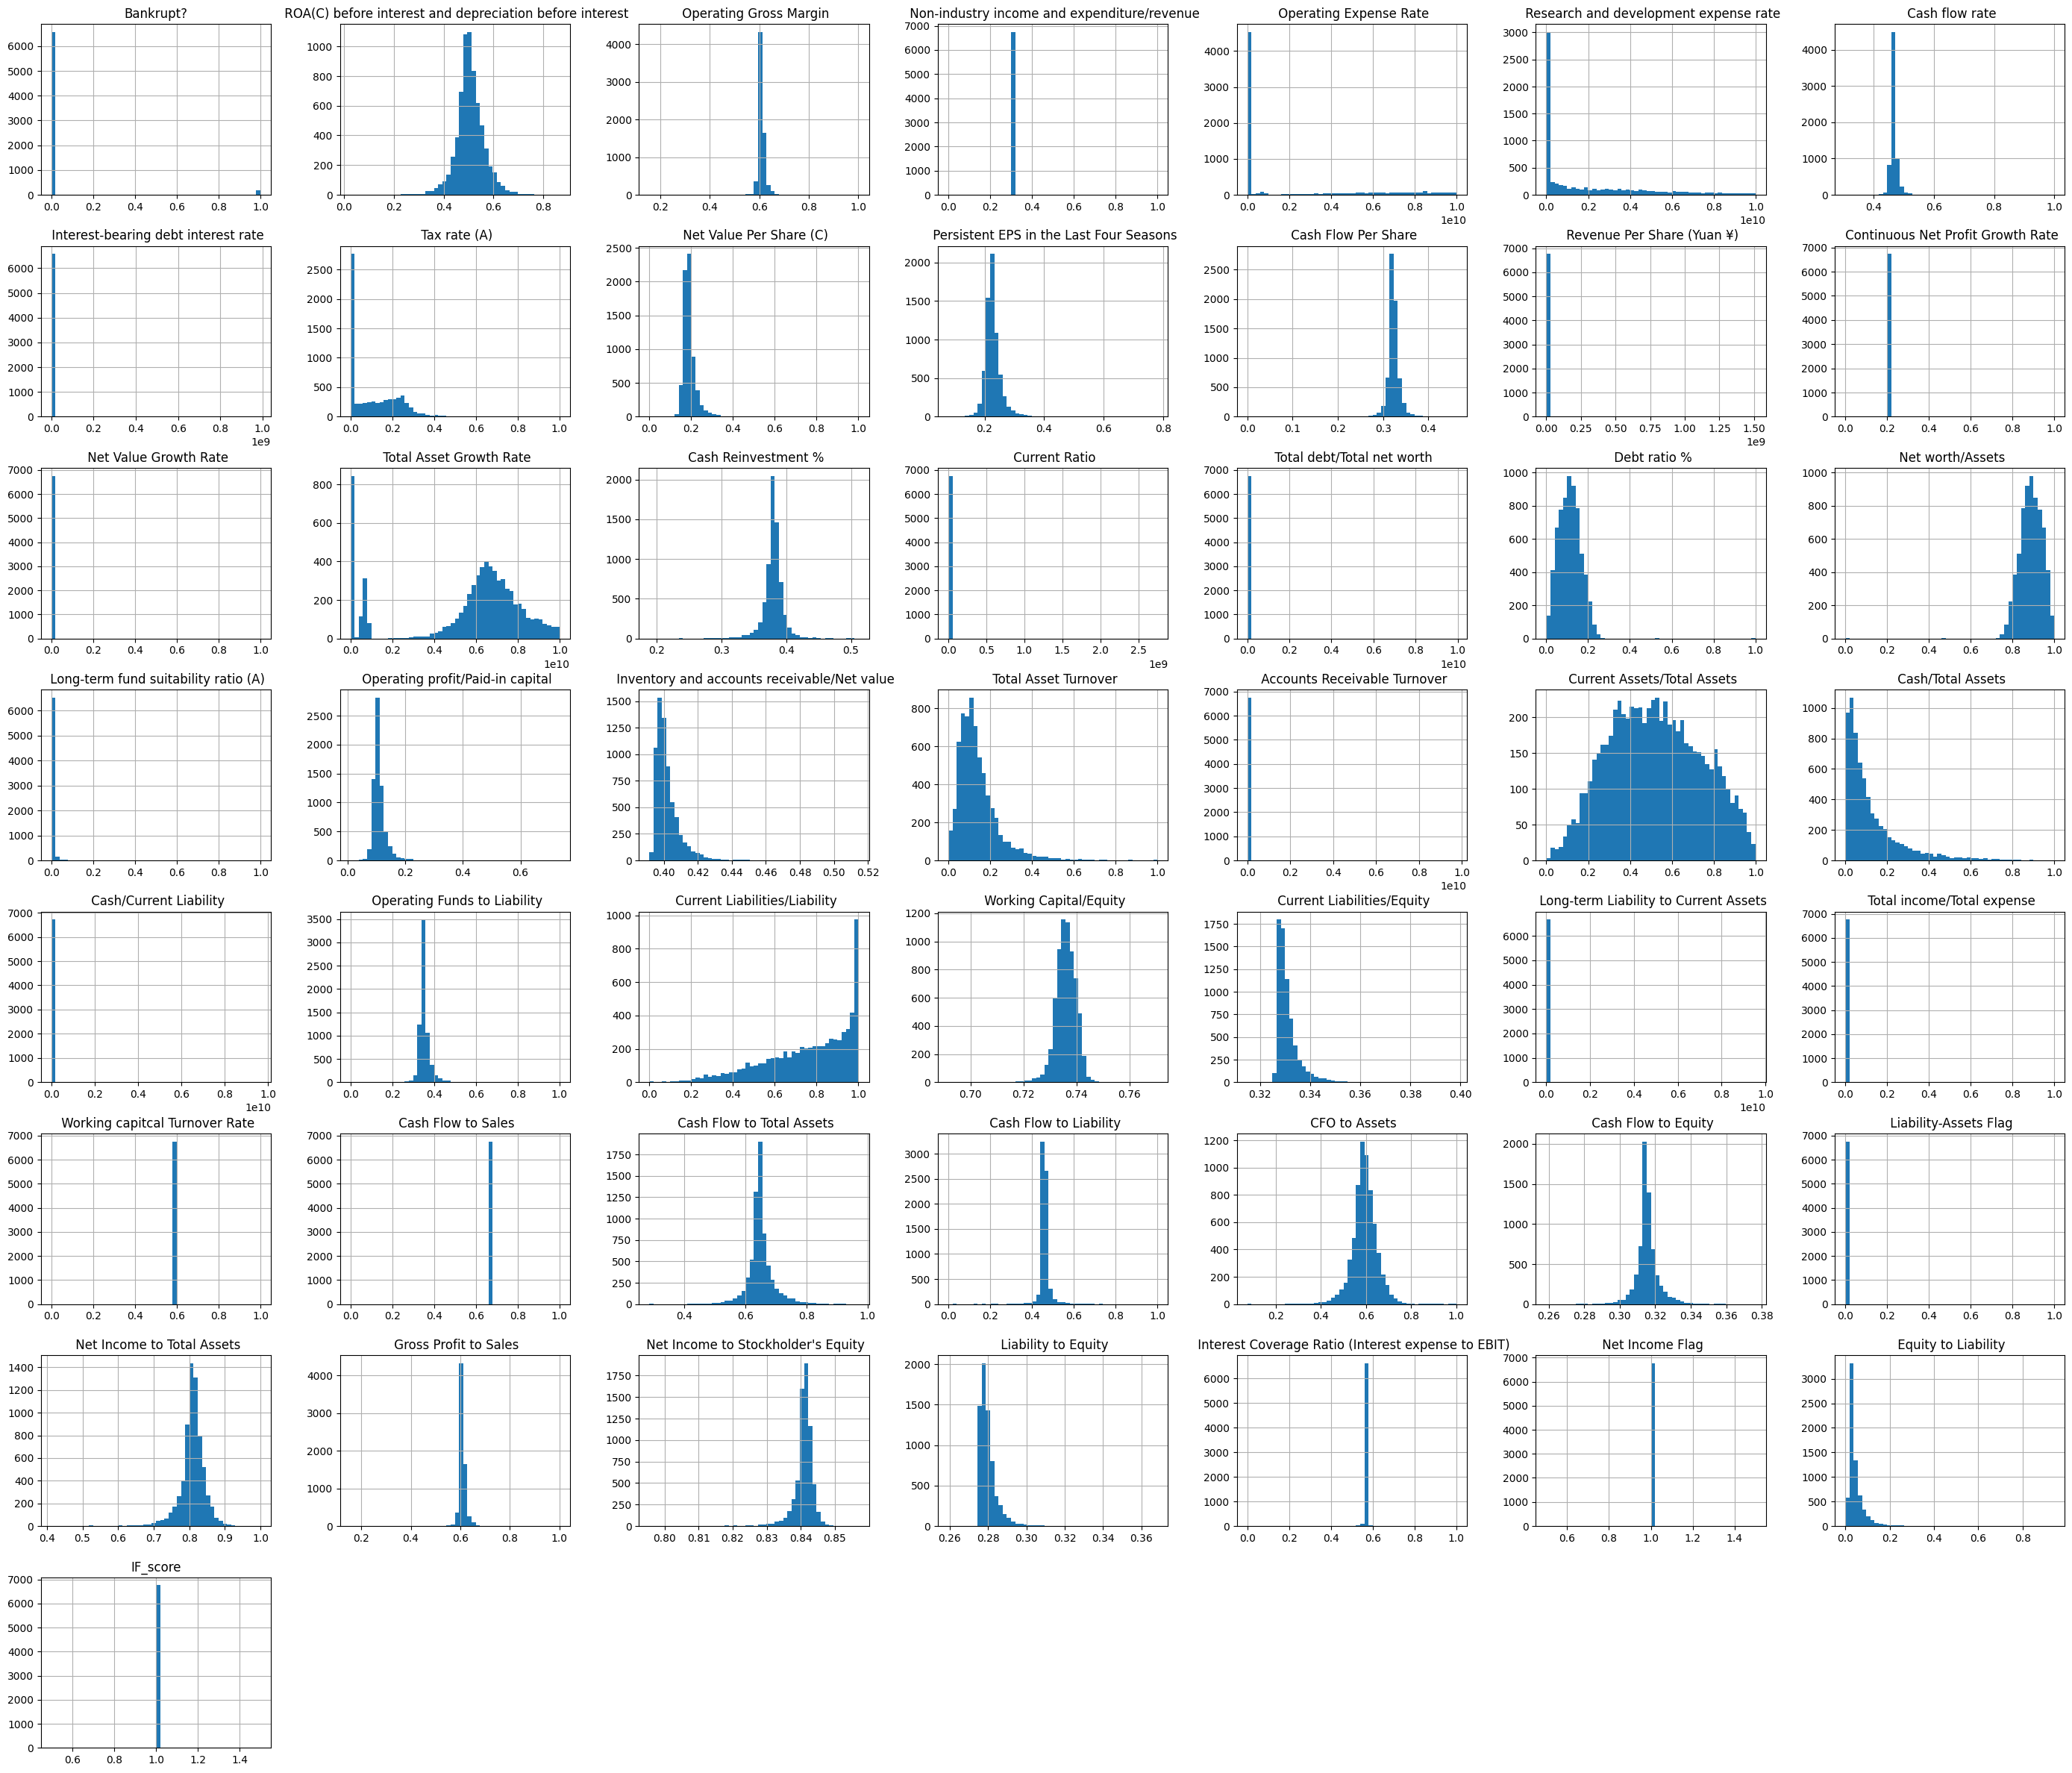

In [10]:
#Histogram of the of the dataset
df.hist(figsize = (35,30), bins = 50)
plt.show()

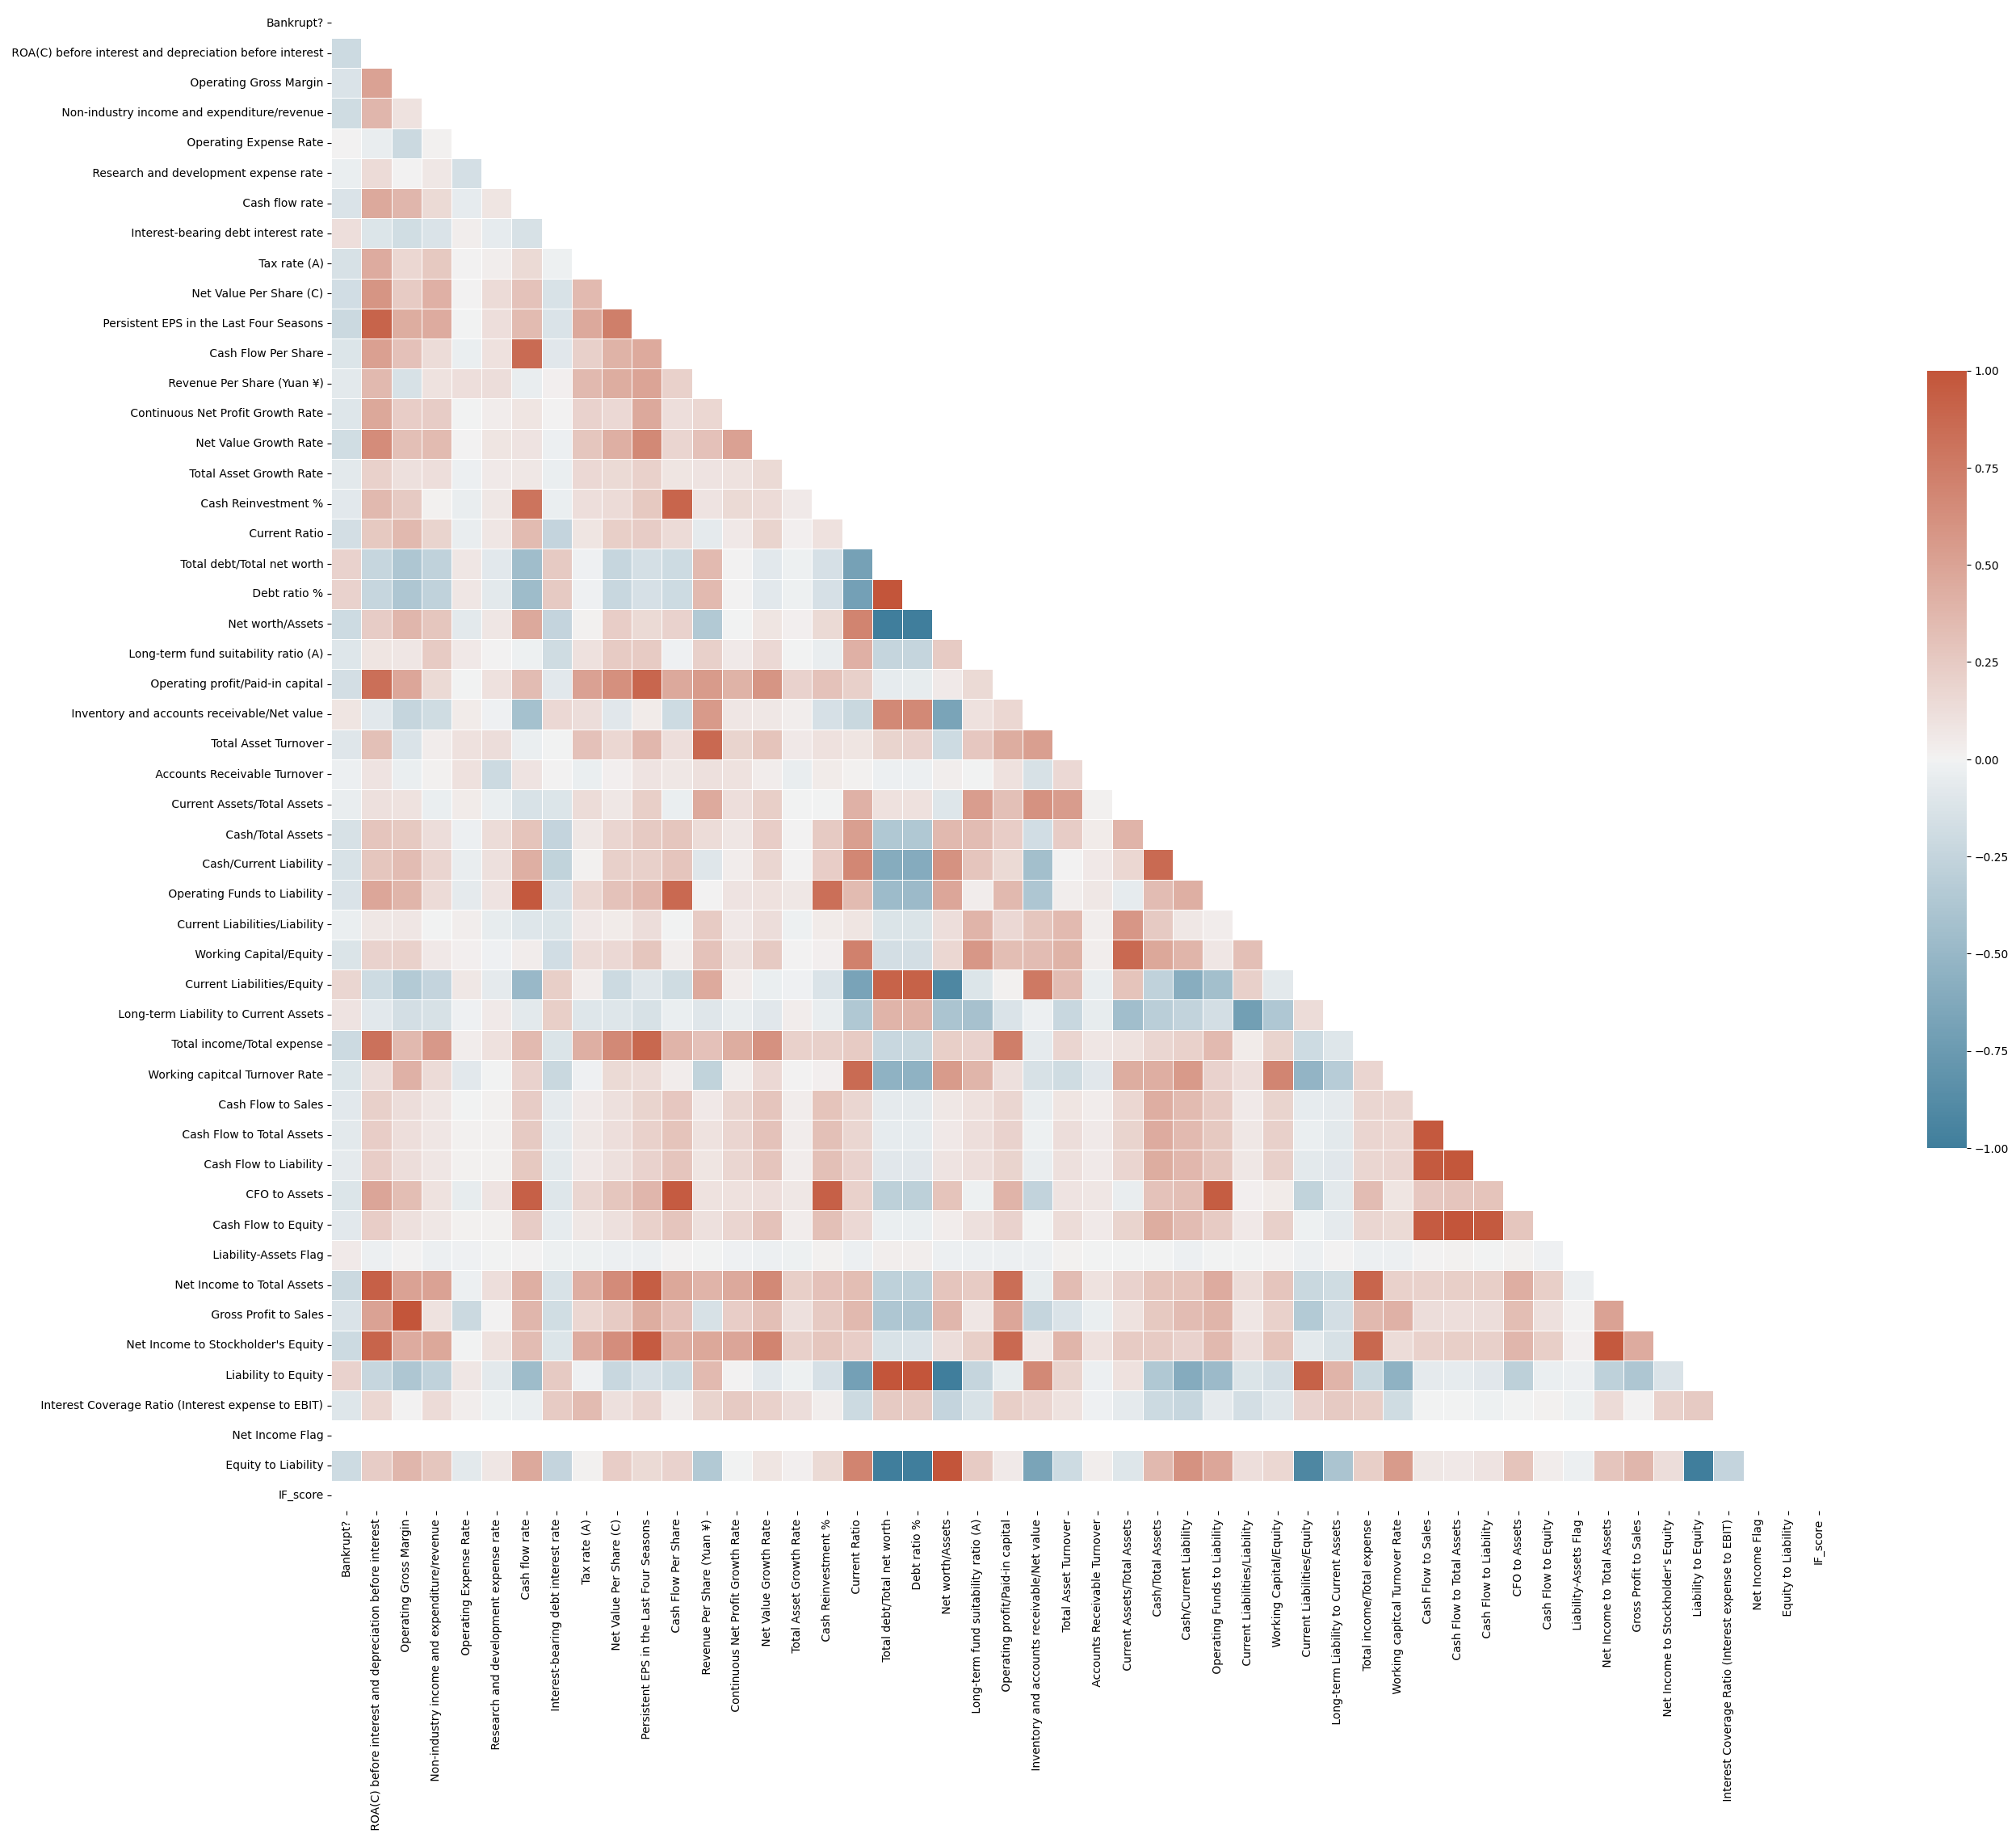

In [11]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Would Recommend:      0
1   192
0  6564
Proportion Chance Criterion: 2.84%
1.25 * Proportion Chance Criterion: 3.55%


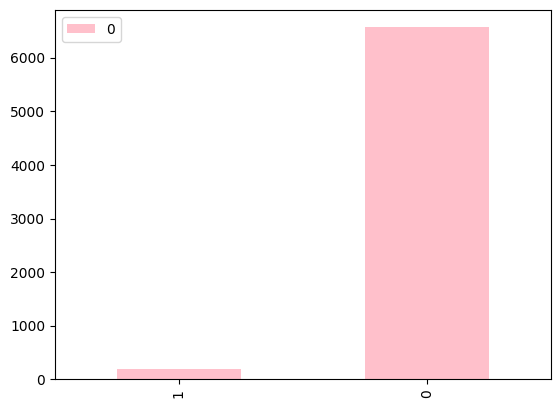

In [12]:
#Baseline Scores
state_counts = Counter(df['Bankrupt?'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color='pink')

num=(df_state[0]/df_state[0].sum())[1]

print("Would Recommend:{}".format(df_state))
print("Proportion Chance Criterion: {:0.2f}%".format(100*num))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num))

In [13]:
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
                                                                  random_state=11, test_size=0.25,
                                                                  stratify=y)

### Auto-ML

In [14]:
def auto_ml(X, y, models_dict, scaler=None, cv=None, res_t=None):
    """Apply resampling for imbalanced data"""
    results = {}
    results2 = {}

    # log start time
    total_start = time.time()

    for model_name, model in tqdm(models_dict.items()):
        
        ################# this portion can be edited ###############
        train_scores = []
        val_scores = []

        train_recall = []
        val_recall = []
        
        train_precision = []
        val_precision = []
        
        train_f1 = []
        val_f1 = []

        ###########################################################

        for train_index, val_index in tqdm(cv.split(X, y)):

            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Apply scaling
            if scaler is not None:
                X_train = scaler.fit_transform(X_train)
                X_val = scaler.transform(X_val)
            else:
                pass

            # Apply resampling
            if res_t is not None:
                s = time.time()
                X_train, y_train = res_t.fit_resample(X_train, y_train)
                print(f'Resampling done in {time.time() - s}')
            else:
                pass

            start_time = time.time()

            # fit
            model.fit(X_train, y_train)

            # predict
            train_preds = model.predict(X_train)
            val_preds = model.predict(X_val)
            
            ################# this portion can be edited ###############

            # classification accuracy
            train_scores.append(model.score(X_train, y_train))
            val_scores.append(model.score(X_val, y_val))

            # recall
            train_recall.append(recall_score(y_train, train_preds))
            val_recall.append(recall_score(y_val, val_preds))
            
            #precision
            train_precision.append(precision_score(y_train, train_preds))
            val_precision.append(precision_score(y_val, val_preds))
            
            #f1 score
            train_f1.append(f1_score(y_train, train_preds))
            val_f1.append(f1_score(y_train,train_preds))
                               

            end_time = time.time()

            results[model_name] = {
                'Train Accuracy': np.round(np.mean(train_scores) * 100, 2),
                'Val Accuracy': np.round(np.mean(val_scores) * 100, 2),
                'Train Recall': np.round(np.mean(train_recall) * 100, 2),
                'Val Recall': np.round(np.mean(val_recall) * 100, 2),
                'Train Precision' : np.round(np.mean(train_precision) *100,2),
                'Val Precision': np.round(np.mean(val_precision) * 100, 2),
                'Train F1-Score': np.round(np.mean(train_f1) * 100, 2),
                'Val F1-Score': np.round(np.mean(val_f1) * 100, 2),
                'Run Time': end_time - start_time
            }

            results2[model_name] = {
                'Train Accuracy': '{:.2f}%'.format(np.round(np.mean(train_scores)*100, 2)),
                'Val Accuracy': '{:.2f}%'.format(np.round(np.mean(val_scores)*100, 2)),
                'Train Recall': '{:.2f}%'.format(np.round(np.mean(train_recall)*100, 2)),
                'Val Recall': '{:.2f}%'.format(np.round(np.mean(val_recall)*100, 2)),
                'Train Precision': '{:.2f}%'.format(np.round(np.mean(train_precision) *100,2)),
                'Val Precision': '{:.2f}%'.format(np.round(np.mean(val_precision) *100,2)),
                'Train F1-Score': '{:.2f}%'.format(np.round(np.mean(train_f1) *100,2)),
                'Val F1-Score': '{:.2f}%'.format(np.round(np.mean(val_f1) *100,2)),
                'Run Time': end_time - start_time
            }
            
            ###########################################################

    results = pd.DataFrame(results).T
    results2 = pd.DataFrame(results2).T
    return [results, results2]

#### Baseline

In [15]:
models_dict = {'LogisticRegressor': LogisticRegression(),
               'GaussianNB': GaussianNB(),
               'RandomForestClassifier': RandomForestClassifier(random_state=143),
               'DecisionTreeClassifier': DecisionTreeClassifier(random_state=143),
               'GradientBoostingClassifier': GradientBoostingClassifier(random_state=143)}

# models_dict = {
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'LogisticRegressor': LogisticRegression(),
#     'GaussianNB': GaussianNB(),
#     'RandomForestClassifier': RandomForestClassifier(random_state=143),
#     'DecisionTreeClassifier': DecisionTreeClassifier(random_state=143),
#     'GradientBoostingClassifier': GradientBoostingClassifier(random_state=143)   
# }

In [16]:
auto_run = auto_ml(X_trainval, y_trainval, models_dict, scaler=MinMaxScaler(),
               cv=StratifiedKFold(n_splits=5))
auto = auto_run[0]
auto_run[1]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Train Accuracy Val Accuracy Train Recall  \
LogisticRegressor                  97.13%       97.04%        4.86%   
GaussianNB                         33.06%       32.05%       97.22%   
RandomForestClassifier            100.00%       97.22%      100.00%   
DecisionTreeClassifier            100.00%       95.46%      100.00%   
GradientBoostingClassifier         99.30%       96.84%       75.87%   

                           Val Recall Train Precision Val Precision  \
LogisticRegressor               4.85%          45.94%        39.67%   
GaussianNB                     94.43%           4.00%         3.86%   
RandomForestClassifier          8.33%         100.00%        73.94%   
DecisionTreeClassifier         27.76%         100.00%        24.24%   
GradientBoostingClassifier     18.05%          99.55%        41.15%   

                           Train F1-Score Val F1-Score  Run Time  
LogisticRegressor                   8.78%        8.78%  0.029127  
GaussianNB                          7.68%        7.68%  0.014535  
RandomForestClassifier            100.00%      100.00%  1.406255  
DecisionTreeClassifier            100.00%      100.00%  0.150276  
GradientBoostingClassifier         86.11%       86.11%  4.675446

### Applying resampling techniques

In [17]:
res_list = [('SMOTE', SMOTE()),
            ('ADASYN', ADASYN()),
            ('SMOTEENN',SMOTEENN()) ]

outputs = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    var = auto_ml(X_trainval, y_trainval, models_dict, scaler=MinMaxScaler(),
                    cv=StratifiedKFold(n_splits=5), res_t=res)
    outputs.append(var[0])
    display(var[1])

---------------------------------------------------SMOTE---------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Resampling done in 0.1133885383605957
Resampling done in 0.008535623550415039
Resampling done in 0.008726119995117188
Resampling done in 0.009021997451782227
Resampling done in 0.009130716323852539


0it [00:00, ?it/s]

Resampling done in 0.008577108383178711
Resampling done in 0.007521390914916992
Resampling done in 0.00902414321899414
Resampling done in 0.009712934494018555
Resampling done in 0.008002758026123047


0it [00:00, ?it/s]

Resampling done in 0.007031917572021484
Resampling done in 0.007517576217651367
Resampling done in 0.008020639419555664
Resampling done in 0.008206605911254883
Resampling done in 0.008849382400512695


0it [00:00, ?it/s]

Resampling done in 0.0070188045501708984
Resampling done in 0.007532596588134766
Resampling done in 0.008698225021362305
Resampling done in 0.0075457096099853516
Resampling done in 0.007520198822021484


0it [00:00, ?it/s]

Resampling done in 0.009300708770751953
Resampling done in 0.008530139923095703
Resampling done in 0.008551836013793945
Resampling done in 0.008461475372314453
Resampling done in 0.008521318435668945


Train Accuracy Val Accuracy Train Recall  \
LogisticRegressor                  88.92%       86.40%       91.21%   
GaussianNB                         68.36%       40.10%       98.05%   
RandomForestClassifier            100.00%       94.89%      100.00%   
DecisionTreeClassifier            100.00%       92.26%      100.00%   
GradientBoostingClassifier         96.62%       90.94%       98.70%   

                           Val Recall Train Precision Val Precision  \
LogisticRegressor              79.93%          87.22%        14.98%   
GaussianNB                     92.34%          61.61%         4.28%   
RandomForestClassifier         43.03%         100.00%        26.41%   
DecisionTreeClassifier         42.36%         100.00%        16.43%   
GradientBoostingClassifier     60.47%          94.76%        17.89%   

                           Train F1-Score Val F1-Score  Run Time  
LogisticRegressor                  89.17%       89.17%  0.063902  
GaussianNB                         75.64%       75.64%  0.030697  
RandomForestClassifier            100.00%      100.00%  4.130026  
DecisionTreeClassifier            100.00%      100.00%   0.48419  
GradientBoostingClassifier         96.69%       96.69%  9.895615

--------------------------------------------------ADASYN---------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Resampling done in 0.012703657150268555
Resampling done in 0.010134696960449219
Resampling done in 0.011238574981689453
Resampling done in 0.010679244995117188
Resampling done in 0.011026144027709961


0it [00:00, ?it/s]

Resampling done in 0.011021614074707031
Resampling done in 0.01203155517578125
Resampling done in 0.009054899215698242
Resampling done in 0.011059284210205078
Resampling done in 0.00955057144165039


0it [00:00, ?it/s]

Resampling done in 0.010602235794067383
Resampling done in 0.010527372360229492
Resampling done in 0.01073908805847168
Resampling done in 0.01106572151184082
Resampling done in 0.010530948638916016


0it [00:00, ?it/s]

Resampling done in 0.010536432266235352
Resampling done in 0.013233184814453125
Resampling done in 0.011176824569702148
Resampling done in 0.009549856185913086
Resampling done in 0.010024547576904297


0it [00:00, ?it/s]

Resampling done in 0.010032892227172852
Resampling done in 0.011211156845092773
Resampling done in 0.013031721115112305
Resampling done in 0.010047197341918945
Resampling done in 0.011559486389160156


Train Accuracy Val Accuracy Train Recall  \
LogisticRegressor                  88.19%       85.42%       90.80%   
GaussianNB                         67.37%       38.25%       98.06%   
RandomForestClassifier            100.00%       95.11%      100.00%   
DecisionTreeClassifier            100.00%       92.70%      100.00%   
GradientBoostingClassifier         96.51%       90.63%       98.79%   

                           Val Recall Train Precision Val Precision  \
LogisticRegressor              82.68%          86.22%        14.41%   
GaussianNB                     92.34%          60.74%         4.15%   
RandomForestClassifier         46.55%         100.00%        28.56%   
DecisionTreeClassifier         38.23%         100.00%        16.40%   
GradientBoostingClassifier     62.49%          94.46%        17.88%   

                           Train F1-Score Val F1-Score  Run Time  
LogisticRegressor                  88.45%       88.45%  0.057561  
GaussianNB                         74.99%       74.99%  0.022991  
RandomForestClassifier            100.00%      100.00%  3.996611  
DecisionTreeClassifier            100.00%      100.00%  0.471015  
GradientBoostingClassifier         96.57%       96.57%  9.788792

-------------------------------------------------SMOTEENN--------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Resampling done in 0.09219479560852051
Resampling done in 0.09555172920227051
Resampling done in 0.0776369571685791
Resampling done in 0.09827995300292969
Resampling done in 0.0812680721282959


0it [00:00, ?it/s]

Resampling done in 0.09087920188903809
Resampling done in 0.09041023254394531
Resampling done in 0.09406590461730957
Resampling done in 0.08803915977478027
Resampling done in 0.08889484405517578


0it [00:00, ?it/s]

Resampling done in 0.09599184989929199
Resampling done in 0.08329463005065918
Resampling done in 0.06683468818664551
Resampling done in 0.06571841239929199
Resampling done in 0.06918907165527344


0it [00:00, ?it/s]

Resampling done in 0.08580446243286133
Resampling done in 0.07022857666015625
Resampling done in 0.06722784042358398
Resampling done in 0.06748723983764648
Resampling done in 0.06572294235229492


0it [00:00, ?it/s]

Resampling done in 0.08373689651489258
Resampling done in 0.0676271915435791
Resampling done in 0.06621718406677246
Resampling done in 0.06945347785949707
Resampling done in 0.07021665573120117


Train Accuracy Val Accuracy Train Recall  \
LogisticRegressor                  91.51%       83.82%       93.52%   
GaussianNB                         76.14%       48.43%       97.75%   
RandomForestClassifier            100.00%       92.60%      100.00%   
DecisionTreeClassifier            100.00%       91.26%      100.00%   
GradientBoostingClassifier         98.09%       89.48%       99.33%   

                           Val Recall Train Precision Val Precision  \
LogisticRegressor              84.75%          90.71%        13.39%   
GaussianNB                     91.65%          69.72%         5.00%   
RandomForestClassifier         57.66%         100.00%        21.21%   
DecisionTreeClassifier         48.62%         100.00%        15.97%   
GradientBoostingClassifier     73.65%          97.13%        17.72%   

                           Train F1-Score Val F1-Score  Run Time  
LogisticRegressor                  92.09%       92.09%  0.041009  
GaussianNB                         81.32%       81.32%  0.037124  
RandomForestClassifier            100.00%      100.00%  3.476918  
DecisionTreeClassifier            100.00%      100.00%  0.456322  
GradientBoostingClassifier         98.22%       98.22%  9.344917

In [18]:
ps_over = pd.DataFrame(index=models_dict.keys())
ps_over['NoResampling Val Recall'] = auto_run[0]['Val Recall']
ps_over['SMOTE Val Recall'] = outputs[0]['Val Recall']
ps_over['ADASYN Val Recall'] = outputs[1]['Val Recall']
ps_over['SMOTEEN Val Recall'] = outputs[2]['Val Recall']

ps_over

NoResampling Val Recall  SMOTE Val Recall  \
LogisticRegressor                              4.85             79.93   
GaussianNB                                    94.43             92.34   
RandomForestClassifier                         8.33             43.03   
DecisionTreeClassifier                        27.76             42.36   
GradientBoostingClassifier                    18.05             60.47   

                            ADASYN Val Recall  SMOTEEN Val Recall  
LogisticRegressor                       82.68               84.75  
GaussianNB                              92.34               91.65  
RandomForestClassifier                  46.55               57.66  
DecisionTreeClassifier                  38.23               48.62  
GradientBoostingClassifier              62.49               73.65

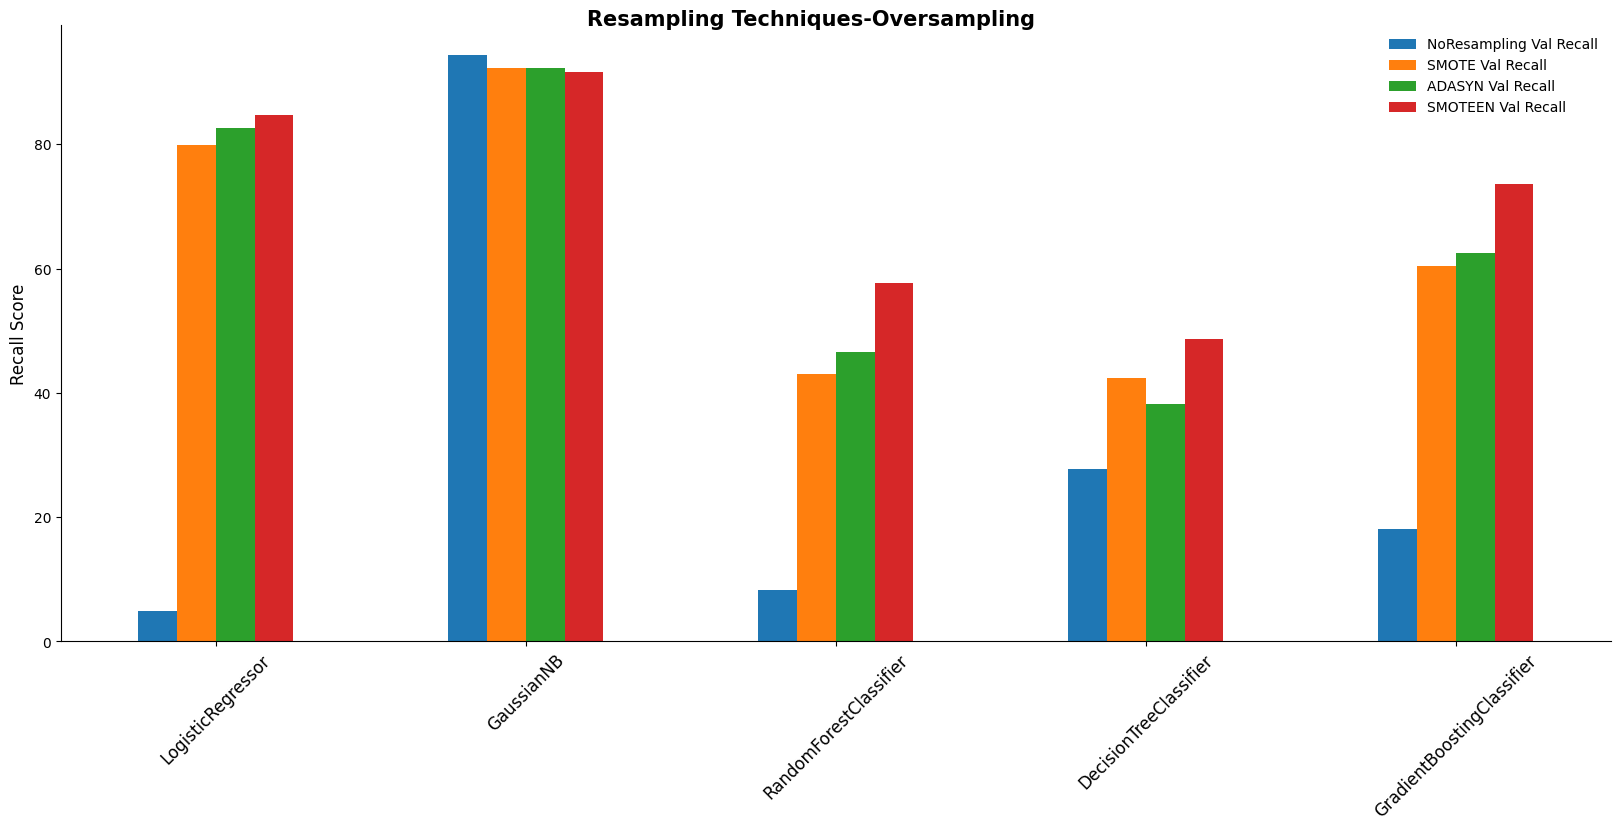

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
ps_over.plot.bar(ax=ax)
ax.set_ylabel('Recall Score', fontsize=12)
for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
ax.legend(edgecolor='white')
fig.suptitle("Resampling Techniques-Oversampling", size=15, y=0.9, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Randomized Search Cross Validation

In [20]:
def train_gb(X, y, metric, res_t=None, hypertune=False, resample=False):
    params = {"n_estimators": [100],
              "learning_rate": [0.001, 0.005, 0.01]
             }
    new_params = {'gradientboostingclassifier__' +
                  key: params[key] for key in params}

    skf = StratifiedKFold(n_splits=3)
    if resample is True:
        imba_pipeline = make_pipeline(MinMaxScaler(),
                                      res_t,
                                      GradientBoostingClassifier(random_state=143))
    else:
        imba_pipeline = make_pipeline(MinMaxScaler(),
                                      GradientBoostingClassifier(random_state=143))

    if hypertune is True:
        clf = GridSearchCV(imba_pipeline, param_grid=new_params,
                           cv=skf, scoring=metric, return_train_score=True,
                          verbose=10)
        start_time = time.time()
        clf.fit(X, y)
        run_time = (time.time() - start_time)
        model = clf.best_estimator_.fit(X, y)
        return ['Gradient Boosting Classifier', np.mean(clf.cv_results_['mean_train_score']),
                clf.best_score_, 'Best parameters = {0}'.format(
                    clf.best_params_),
                run_time, model]
    else:
        clf = imba_pipeline
        start_time = time.time()
        clf.fit(X, y)
        run_time = (time.time() - start_time)
        cv_scores = cross_validate(estimator=clf, X=X, y=y,
                                   scoring=metric, cv=skf, n_jobs=-1,
                                   return_train_score=True)

        return ['Gradient Boosting Classifier', np.mean(cv_scores['train_score']),
                np.mean(cv_scores['test_score']), run_time, clf]

In [21]:
start_time = time.time()
gb_tk_rec = train_gb(X_trainval, y_trainval, 'recall', SMOTEENN(),
                       hypertune=True, resample=True)
start_time = time.time()
gb_tk_acc = train_gb(X_trainval, y_trainval, 'accuracy', SMOTEENN(),
                      hypertune=True, resample=True)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__n_estimators=100
[CV 1/3; 1/3] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__n_estimators=100;, score=(train=0.948, test=0.896) total time=   7.6s
[CV 2/3; 1/3] START gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__n_estimators=100
[CV 2/3; 1/3] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__n_estimators=100;, score=(train=0.938, test=0.875) total time=   7.6s
[CV 3/3; 1/3] START gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__n_estimators=100
[CV 3/3; 1/3] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__n_estimators=100;, score=(train=0.969, test=0.833) total time=   7.8s
[CV 1/3; 2/3] START gradientboostingclassifier__learning_rate=0.005, gradientboostingclassifier__n_estim

In [22]:
gb_tk_rec

['Gradient Boosting Classifier',
 0.9363425925925926,
 0.8680555555555557,
 "Best parameters = {'gradientboostingclassifier__learning_rate': 0.001, 'gradientboostingclassifier__n_estimators': 100}",
 82.59609603881836,
 Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smoteenn', SMOTEENN()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(learning_rate=0.001,
                                             random_state=143))])]

In [23]:
gb_tk_acc

['Gradient Boosting Classifier',
 0.8252417604104992,
 0.8393526741661733,
 "Best parameters = {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 100}",
 80.93097615242004,
 Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smoteenn', SMOTEENN()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(learning_rate=0.01,
                                             random_state=143))])]

In [24]:
cols = ['', 'Train Accuracy', 'Val Accuracy',
        'Train Recall', 'Val Recall']
hyper = pd.DataFrame(columns=cols)
hyper.loc[0] = [gb_tk_rec[0],
                np.round(gb_tk_acc[1]*100, 6),
                np.round(gb_tk_acc[2]*100, 6),
                np.round(gb_tk_rec[1]*100, 6),
                np.round(gb_tk_rec[2]*100, 6)]
hyper2 = pd.DataFrame(columns=cols)
hyper2.loc[0] = [gb_tk_rec[0],
                 '{:.2f}%'.format(np.round(gb_tk_acc[1]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_acc[2]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_rec[2]*100, 2))]
hyper2.style.hide_index()

In [25]:
# re-fitting for the holdout
rh = gb_tk_rec[-1]
rh.fit(X_trainval, y_trainval)
y_preds = rh.predict(X_holdout)
rh_holdout_score = recall_score(y_holdout, y_preds)

In [26]:
rh_holdout_score

0.9583333333333334

In [27]:
rh

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smoteenn', SMOTEENN()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.001,
                                            random_state=143))])

### Base-case

In [28]:
# cross-validation
base_var = train_gb(X_trainval, y_trainval, 'recall', hypertune=False, resample=False)

# re-fitting for the holdout
base_model = base_var[-1]
base_model.fit(X_trainval, y_trainval)
y_preds = base_model.predict(X_holdout)
holdout_score = recall_score(y_holdout, y_preds)

In [29]:
cols = ['Method', 'Train Recall', 'Val Recall', 'Holdout Recall']
summary = pd.DataFrame(columns=cols)
summary.loc[0] = ['No Resampling',
                 '{:.2f}%'.format(np.round(base_var[1]*100, 2)),
                 '{:.2f}%'.format(np.round(base_var[2]*100, 2)),
                 '{:.2f}%'.format(np.round(holdout_score*100, 2))]
summary.loc[3] = ['Resampling x Hypertune',
                 '{:.2f}%'.format(np.round(gb_tk_rec[1]*100, 2)),
                 '{:.2f}%'.format(np.round(gb_tk_rec[2]*100, 2)),
                 '{:.2f}%'.format(np.round(rh_holdout_score*100, 2))]
summary.style.hide_index()

### Explainability and Interpretability

#### <div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold"> SHAP </span></div>

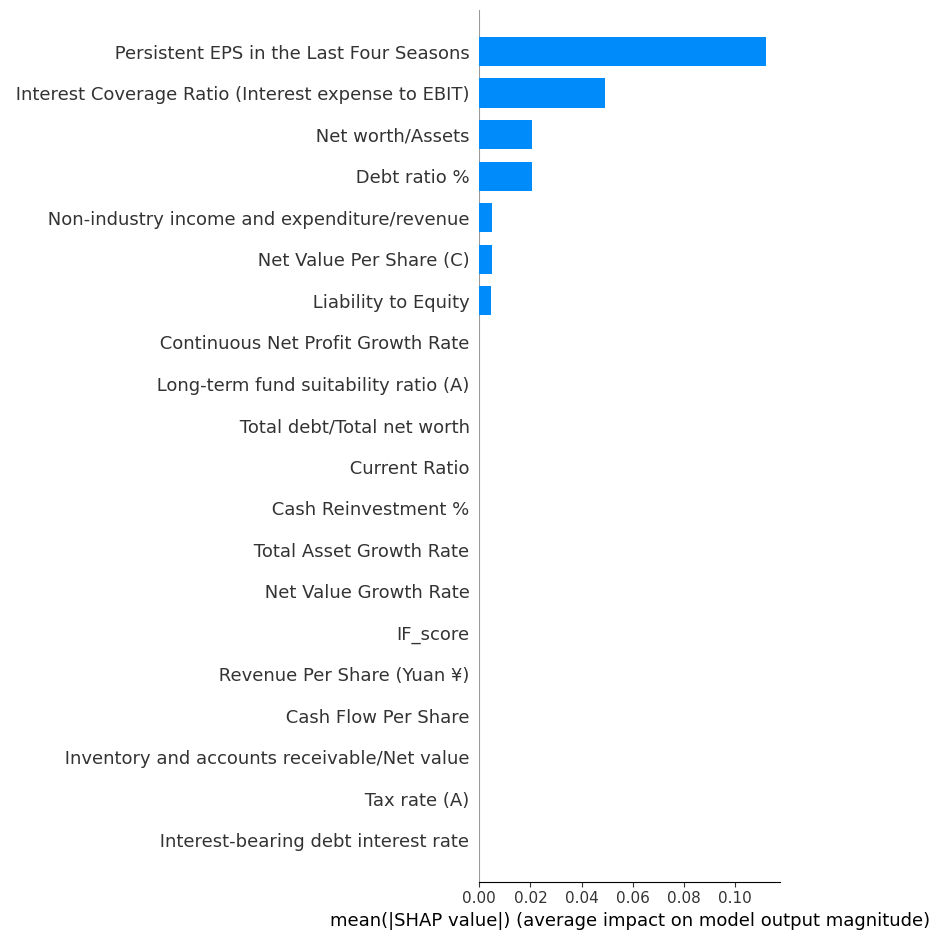

In [413]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=X_holdout.columns)
shap_values = explainer.shap_values(X_holdout, check_additivity=False)
shap.summary_plot(shap_values, X_holdout.columns, plot_type='bar')

#### <div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold"> Forceplot </span></div>

In [414]:
predictions = model.predict(X_holdout)
predictions

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [415]:
indices = np.where(predictions == 1)[0]
print(len(indices))
indices

590


array([   1,   10,   11,   12,   13,   24,   26,   27,   33,   35,   37,
         41,   44,   45,   51,   53,   55,   56,   58,   59,   62,   63,
         65,   70,   74,   75,   78,   83,   85,   89,   90,   92,   94,
         95,   98,   99,  103,  104,  105,  110,  113,  115,  117,  121,
        125,  128,  130,  132,  138,  139,  142,  145,  146,  150,  154,
        156,  157,  160,  161,  163,  164,  165,  166,  170,  179,  183,
        184,  188,  192,  200,  206,  214,  216,  222,  223,  227,  228,
        230,  232,  237,  238,  243,  247,  251,  258,  262,  269,  270,
        276,  278,  283,  297,  303,  304,  306,  309,  310,  311,  319,
        321,  324,  326,  329,  330,  334,  337,  341,  344,  348,  349,
        352,  353,  354,  362,  366,  368,  369,  370,  374,  377,  384,
        385,  386,  390,  391,  394,  395,  398,  399,  400,  401,  402,
        403,  405,  408,  415,  419,  420,  423,  425,  427,  434,  435,
        437,  439,  442,  443,  444,  445,  447,  4

#### Bankrupt!

In [416]:
model.predict(X_holdout.loc[[2001]])

array([1], dtype=int64)

In [417]:
sample = X_holdout.reset_index()
sample[sample['index'] == 2001]

index   ROA(C) before interest and depreciation before interest  \
70   2001                                           0.497489          

     Operating Gross Margin   Non-industry income and expenditure/revenue  \
70                 0.601962                                      0.303454   

     Operating Expense Rate   Research and development expense rate  \
70                 0.000116                            4.650000e+09   

     Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
70         0.459222                              0.000319            0.0   

     Net Value Per Share (C)  ...   Cash Flow to Equity  \
70                  0.162109  ...              0.317192   

     Liability-Assets Flag   Net Income to Total Assets  \
70                       0                      0.79451   

     Gross Profit to Sales   Net Income to Stockholder's Equity  \
70                 0.60196                             0.839835   

     Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
70               0.28868                                           0.572881     

     Net Income Flag   Equity to Liability  IF_score  
70                 1              0.017147         1  

[1 rows x 50 columns]

In [418]:
explainer.expected_value #The base line value

array([0.11584358])

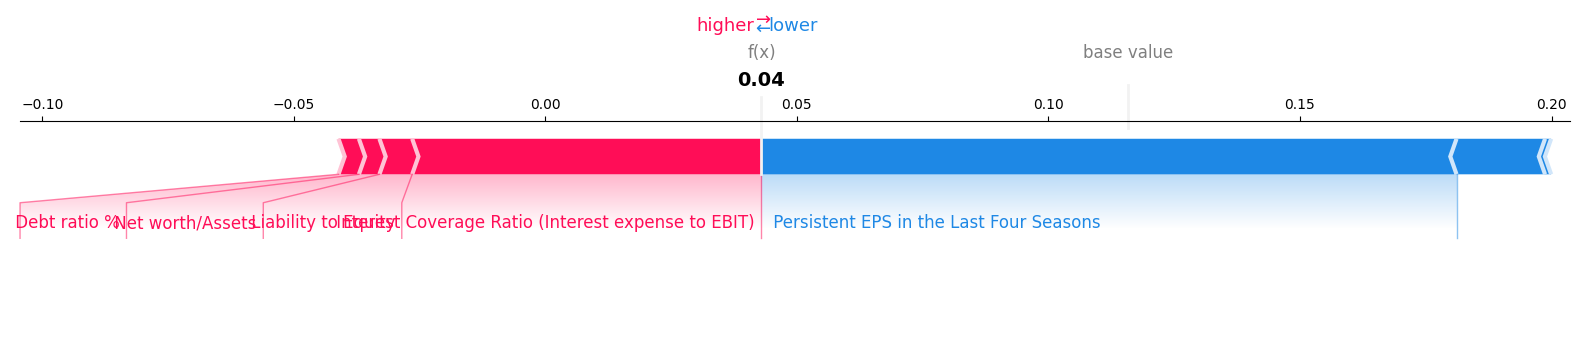

In [419]:
shap.force_plot(explainer.expected_value, 
                shap_values[70], X_holdout.columns, matplotlib=True)

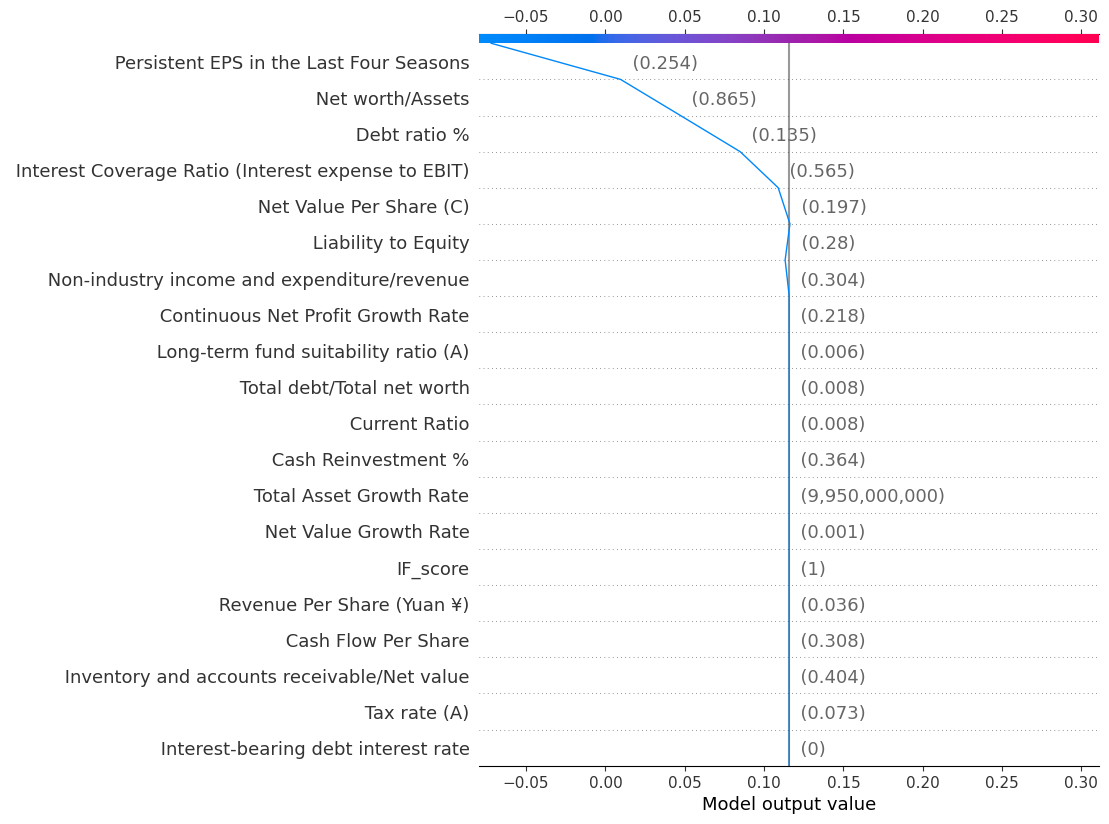

In [420]:
shap.decision_plot(explainer.expected_value, shap_values[1231], X_holdout, show=False)

#### Not Bankrupt

In [421]:
X_holdout.loc[[3913]].style

In [422]:
model.predict(X_holdout.loc[[3913]])

array([0], dtype=int64)

In [423]:
sample = X_holdout.reset_index()
sample[sample['index'] == 3913]

index   ROA(C) before interest and depreciation before interest  \
1231   3913                                           0.553405          

       Operating Gross Margin   Non-industry income and expenditure/revenue  \
1231                 0.611662                                      0.303481   

       Operating Expense Rate   Research and development expense rate  \
1231             9.020000e+09                            5.740000e+09   

       Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
1231         0.483561                              0.000219       0.160846   

       Net Value Per Share (C)  ...   Cash Flow to Equity  \
1231                  0.192491  ...              0.315258   

       Liability-Assets Flag   Net Income to Total Assets  \
1231                       0                     0.810323   

       Gross Profit to Sales   Net Income to Stockholder's Equity  \
1231                0.611659                             0.840902   

       Liability to Equity  \
1231              0.276704   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
1231                                           0.565528                   1   

       Equity to Liability  IF_score  
1231              0.058098         1  

[1 rows x 50 columns]

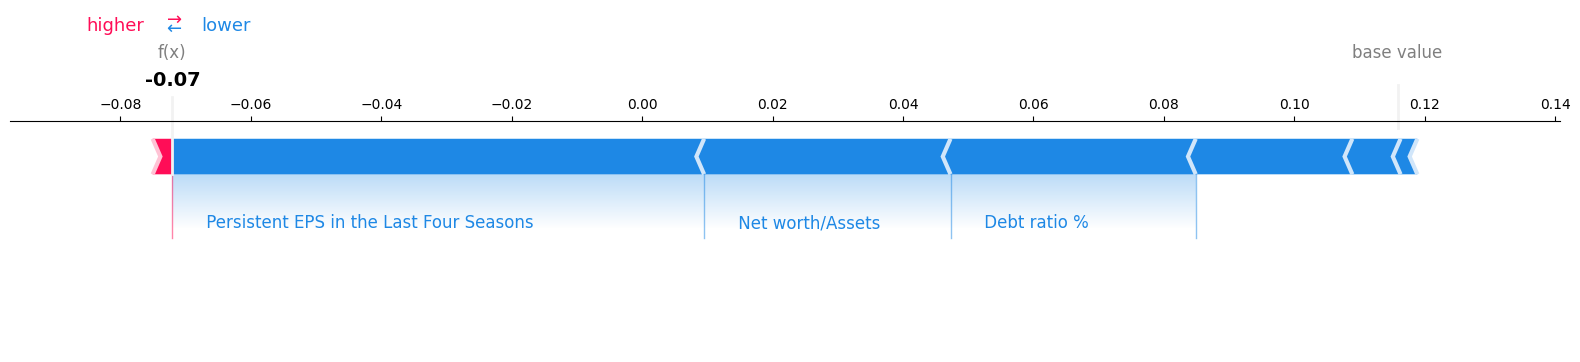

In [424]:
shap.force_plot(explainer.expected_value, 
                shap_values[1231], X_holdout.columns, matplotlib=True)

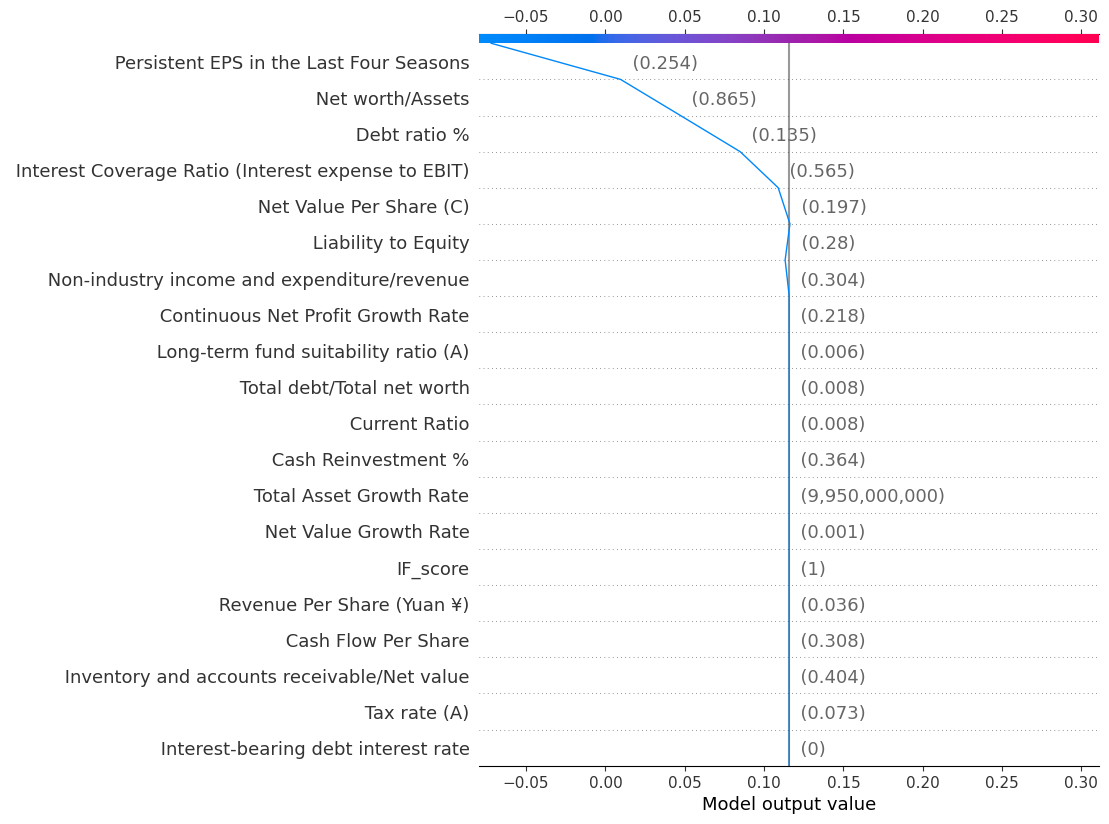

In [425]:
shap.decision_plot(explainer.expected_value, shap_values[1231], X_holdout, show=False)

In [ ]:
# Update the values in the dictionary
columns = {
    ' ROA(C) before interest and depreciation before interest': [-0.0352, 0.1494],
    ' Operating Gross Margin': [0.9869, 0.3950],
    ' Non-industry income and expenditure/revenue': [1.0189, 12.0368],
    ' Operating Expense Rate': [3.9399, 0.0380],
    ' Research and development expense rate': [0.0000, 0.0071],
    ' Cash flow rate': [0.0200, 3.3500],
    ' Interest-bearing debt interest rate': [0.3236, 0.7448],
    ' Tax rate (A)': [33.2765, 4.8152],
    ' Net Value Per Share (C)': [2.1530, 3.9960],
    ' Persistent EPS in the Last Four Seasons': [-0.5150, 3.1672],
    ' Cash Flow Per Share': [2.6831, 2.3901],
    ' Revenue Per Share (Yuan ¥)': [0.5034, 13.2337],
    ' Continuous Net Profit Growth Rate': [5.1864, 10.8503],
    ' Net Value Growth Rate': [1.0132, 7.5743],
    ' Total Asset Growth Rate': [1.5955, 24.6228],
    ' Cash Reinvestment %': [1.3518, 0.4243],
    ' Current Ratio': [0.4700, 1.2200],
    ' Total debt/Total net worth': [42.7374, 0.4918],
    ' Debt ratio %': [0.6589, 35.5500],
    ' Net worth/Assets': [0.0154, 0.3467],
    ' Long-term fund suitability ratio (A)': [0.0150, 1.5276],
    ' Operating profit/Paid-in capital': [-0.6874, 2.5869],
    ' Inventory and accounts receivable/Net value': [11.8074, 0.0098],
    ' Total Asset Turnover': [0.0493, 1.9433],
    ' Accounts Receivable Turnover': [-47.0064, 0.0015],
    ' Current Assets/Total Assets': [0.0289, 0.3207],
    ' Cash/Total Assets': [0.0000, 0.0009],
    ' Cash/Current Liability': [0.0008, 0.0035],
    ' Operating Funds to Liability': [1.7084, 0.0877],
    ' Current Liabilities/Liability': [0.0294, 0.4033],
    ' Working Capital/Equity': [0.3679, 0.1652],
    ' Current Liabilities/Equity': [0.2153, 0.7600],
    ' Long-term Liability to Current Assets': [1.8995, 0.0038],
    ' Total income/Total expense': [0.0446, 1.0605],
    ' Working capital Turnover Rate': [1.5328, 16.2749],
    ' Cash Flow to Sales': [0.3240, 2.2071],
    ' Cash Flow to Total Assets': [-0.0394, 0.9078],
    ' Cash Flow to Liability': [-2.3281, 3.4457],
    ' CFO to Assets': [-1.3627, 2.8304],
    ' Cash Flow to Equity': [-0.5013, 2.6186],
    ' Liability-Assets Flag': [0.0000, 0.0000],
    ' Net Income to Total Assets': [0.0067, 0.0479],
    ' Gross Profit to Sales': [-0.0002, 3.3033],
    " Net Income to Stockholder's Equity": [-0.4480, 0.1383],
    ' Liability to Equity': [12.5182, 1.8845],
    ' Interest Coverage Ratio (Interest expense to EBIT)': [-30.3682, 0.0764],
    ' Net Income Flag':[1.0000, 1.0000],
    ' Equity to Liability':[0.0799,0.5306],
    ' IF_score': [1,1]}


In [400]:
# Update the values in the dictionary
columns = {
    ' ROA(C) before interest and depreciation before interest': [-0.0352, 0.553405],
    ' Operating Gross Margin': [0.9869, 0.611662],
    ' Non-industry income and expenditure/revenue': [1.0189, 0.303481],
    ' Operating Expense Rate': [3.9399, 9020000000.000000],
    ' Research and development expense rate': [0.0000, 5740000000.000000],
    ' Cash flow rate': [0.0200, 0.483561],
    ' Interest-bearing debt interest rate': [0.3236, 0.000219],
    ' Tax rate (A)': [33.2765, 0.160846],
    ' Net Value Per Share (C)': [2.1530, 0.192491],
    ' Persistent EPS in the Last Four Seasons': [-0.5150, 0.222937],
    ' Cash Flow Per Share': [2.6831, 0.010406],
    ' Revenue Per Share (Yuan ¥)': [0.5034, 13.2337],
    ' Continuous Net Profit Growth Rate': [5.1864, 10.8503],
    ' Net Value Growth Rate': [1.0132, 7.5743],
    ' Total Asset Growth Rate': [1.5955, 6280000000.000000],
    ' Cash Reinvestment %': [1.3518, 0.382922],
    ' Current Ratio': [0.4700, 0.017833],
    ' Total debt/Total net worth': [42.7374, 0.002654],
    ' Debt ratio %': [0.6589, 0.066391],
    ' Net worth/Assets': [0.0154, 0.933],
    ' Long-term fund suitability ratio (A)': [0.0150, 0.005169],
    ' Operating profit/Paid-in capital': [-0.6874, 0.104898],
    ' Inventory and accounts receivable/Net value': [11.8074, 0.395122],
    ' Total Asset Turnover': [0.0493, 0.049475],
    ' Accounts Receivable Turnover': [-47.0064, 0.000941],
    ' Current Assets/Total Assets': [0.0289, 0.309744],
    ' Cash/Total Assets': [0.0000, 0.247984],
    ' Cash/Current Liability': [0.0008, 0.039406],
    ' Operating Funds to Liability': [1.7084, 0.371409],
    ' Current Liabilities/Liability': [0.0294, 0.453265],
    ' Working Capital/Equity': [0.3679, 0.734952],
    ' Current Liabilities/Equity': [0.2153, 0.7600],
    ' Long-term Liability to Current Assets': [1.8995, 0.012612],
    ' Total income/Total expense': [0.0446, 0.002600],
    ' Working capital Turnover Rate': [1.5328, 0.594035],
    ' Cash Flow to Sales': [0.3240, 0.67],
    ' Cash Flow to Total Assets': [-0.0394, 0.64],
    ' Cash Flow to Liability': [-2.3281, 0.46],
    ' CFO to Assets': [-1.3627, 0.63],
    ' Cash Flow to Equity': [-0.5013, 0.31],
    ' Liability-Assets Flag': [0.0000, 0.0000],
    ' Net Income to Total Assets': [0.0067, 0.81],
    ' Gross Profit to Sales': [-0.0002, 0.61],
    " Net Income to Stockholder's Equity": [-0.4480, 0.84],
    ' Liability to Equity': [12.5182, 0.27],
    ' Interest Coverage Ratio (Interest expense to EBIT)': [-30.3682, 0.56],
    ' Net Income Flag':[1.0000, 1.0000],
    ' Equity to Liability':[0.0799,0.05306],
    ' IF_score': [1,1]}


- High Debt Ratio

In [401]:
PSE_data = pd.DataFrame(columns)
PSE_data

ROA(C) before interest and depreciation before interest  \
0                                          -0.035200          
1                                           0.553405          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                 0.986900                                      1.018900   
1                 0.611662                                      0.303481   

    Operating Expense Rate   Research and development expense rate  \
0             3.939900e+00                            0.000000e+00   
1             9.020000e+09                            5.740000e+09   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.020000                              0.323600      33.276500   
1         0.483561                              0.000219       0.160846   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  ...  \
0                  2.153000                                 -0.515000  ...   
1                  0.192491                                  0.222937  ...   

    Cash Flow to Equity   Liability-Assets Flag   Net Income to Total Assets  \
0               -0.5013                     0.0                       0.0067   
1                0.3100                     0.0                       0.8100   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                 -0.0002                               -0.448   
1                  0.6100                                0.840   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0               12.5182                                           -30.3682     
1                0.2700                                             0.5600     

    Net Income Flag   Equity to Liability   IF_score  
0               1.0               0.07990          1  
1               1.0               0.05306          1  

[2 rows x 49 columns]

In [402]:
shap_vals = shap_values[0]

feature_importance = pd.DataFrame(list(zip(PSE_data.columns, shap_vals)),
                                  columns=['column_value', 'shap_vals'])

feature_importance.sort_values(by=['shap_vals'], 
                               ascending=True, 
                               inplace=True)

feature_importance

column_value  shap_vals
8                             Net Value Per Share (C)  -0.002301
2         Non-industry income and expenditure/revenue  -0.001219
0    ROA(C) before interest and depreciation befor...   0.000000
26                                  Cash/Total Assets   0.000000
27                             Cash/Current Liability   0.000000
28                       Operating Funds to Liability   0.000000
29                      Current Liabilities/Liability   0.000000
30                             Working Capital/Equity   0.000000
31                         Current Liabilities/Equity   0.000000
32              Long-term Liability to Current Assets   0.000000
33                         Total income/Total expense   0.000000
34                      Working capital Turnover Rate   0.000000
36                          Cash Flow to Total Assets   0.000000
25                        Current Assets/Total Assets   0.000000
37                             Cash Flow to Liability   0.000000
38                                      CFO to Assets   0.000000
39                                Cash Flow to Equity   0.000000
40                              Liability-Assets Flag   0.000000
41                         Net Income to Total Assets   0.000000
42                              Gross Profit to Sales   0.000000
43                 Net Income to Stockholder's Equity   0.000000
46                                    Net Income Flag   0.000000
35                                 Cash Flow to Sales   0.000000
47                                Equity to Liability   0.000000
24                       Accounts Receivable Turnover   0.000000
22        Inventory and accounts receivable/Net value   0.000000
1                              Operating Gross Margin   0.000000
3                              Operating Expense Rate   0.000000
4               Research and development expense rate   0.000000
5                                      Cash flow rate   0.000000
6                 Interest-bearing debt interest rate   0.000000
7                                        Tax rate (A)   0.000000
10                                Cash Flow Per Share   0.000000
23                               Total Asset Turnover   0.000000
12                  Continuous Net Profit Growth Rate   0.000000
11                         Revenue Per Share (Yuan ¥)   0.000000
14                            Total Asset Growth Rate   0.000000
15                                Cash Reinvestment %   0.000000
16                                      Current Ratio   0.000000
17                         Total debt/Total net worth   0.000000
20               Long-term fund suitability ratio (A)   0.000000
21                   Operating profit/Paid-in capital   0.000000
13                              Net Value Growth Rate   0.000000
48                                           IF_score   0.000000
18                                       Debt ratio %   0.012113
19                                   Net worth/Assets   0.012170
44                                Liability to Equity   0.012329
45   Interest Coverage Ratio (Interest expense to ...   0.046116
9             Persistent EPS in the Last Four Seasons   0.087114

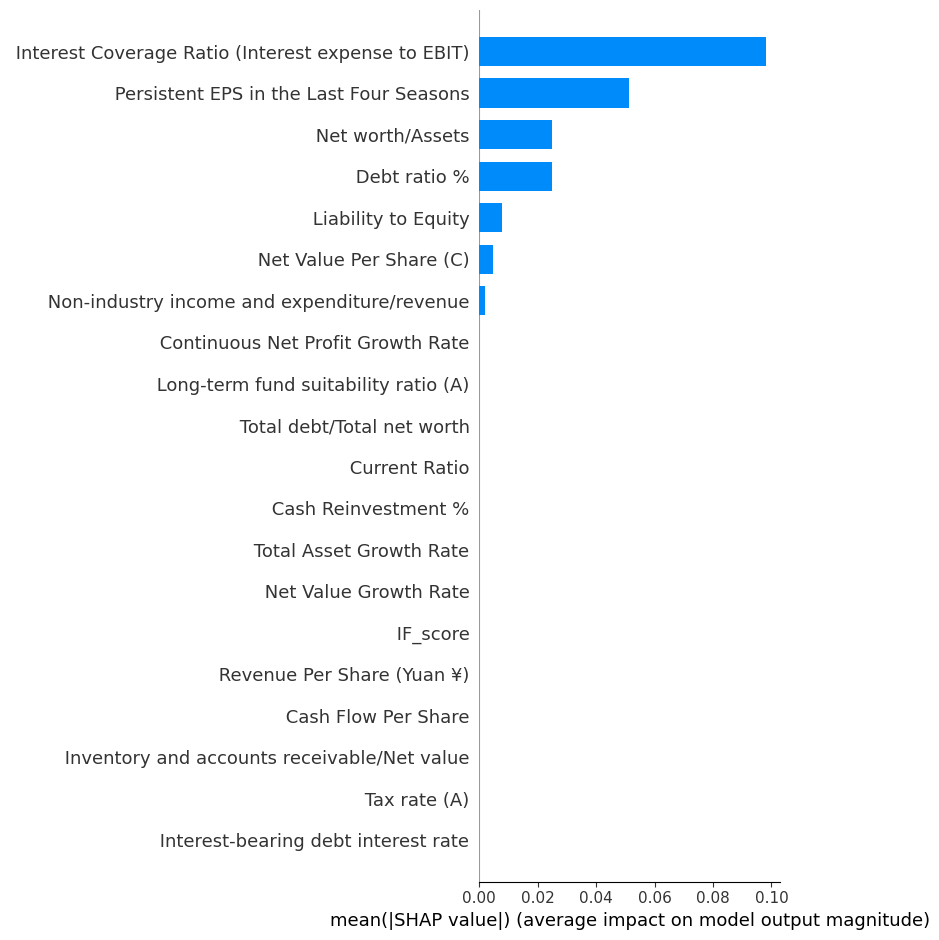

In [403]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=PSE_data.columns)
shap_values = explainer.shap_values(PSE_data, check_additivity=False)
shap.summary_plot(shap_values, PSE_data.columns, plot_type='bar')

In [404]:
model.predict(PSE_data.loc[[0]])

array([1], dtype=int64)

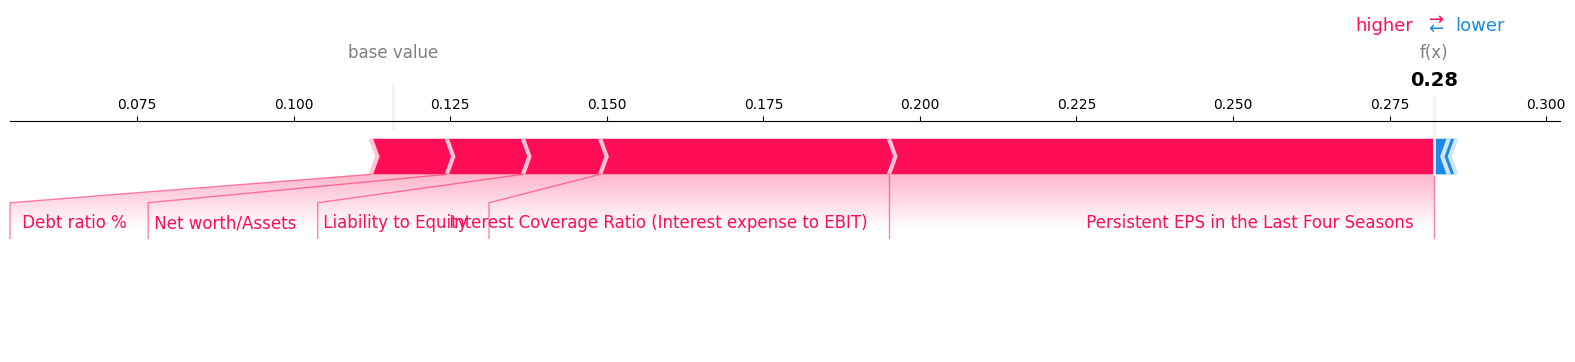

In [405]:
shap.force_plot(explainer.expected_value, 
                shap_values[0], PSE_data.columns, matplotlib=True)

In [406]:
model.predict(PSE_data.loc[[1]])

array([1], dtype=int64)

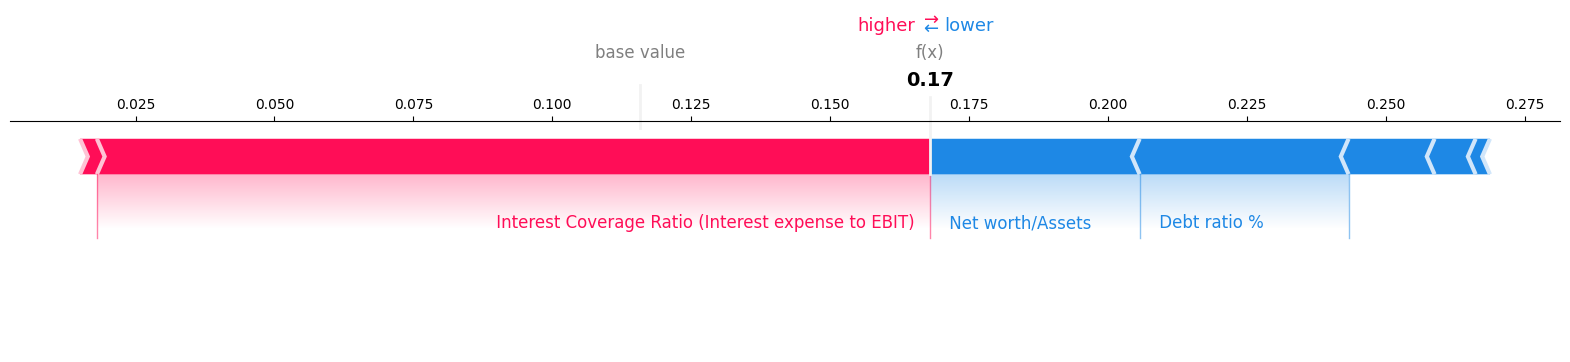

In [407]:
shap.force_plot(explainer.expected_value, 
                shap_values[1], PSE_data.columns, matplotlib=True)

### PAL

In [187]:
arr_PAL = PSE_data.values[0]
arr_PAL

array([-3.52000e-02,  9.86900e-01,  1.01890e+00,  3.93990e+00,
        0.00000e+00,  2.00000e-02,  3.23600e-01,  3.32765e+01,
        2.15300e+00, -5.15000e-01,  2.68310e+00,  5.03400e-01,
        5.18640e+00,  1.01320e+00,  1.59550e+00,  1.35180e+00,
        4.70000e-01,  4.27374e+01,  6.58900e-01,  1.54000e-02,
        1.50000e-02, -6.87400e-01,  1.18074e+01,  4.93000e-02,
       -4.70064e+01,  2.89000e-02,  0.00000e+00,  8.00000e-04,
        1.70840e+00,  2.94000e-02,  3.67900e-01,  2.15300e-01,
        1.89950e+00,  4.46000e-02,  1.53280e+00,  3.24000e-01,
       -3.94000e-02, -2.32810e+00, -1.36270e+00, -5.01300e-01,
        0.00000e+00,  6.70000e-03, -2.00000e-04, -4.48000e-01,
        1.25182e+01, -3.03682e+01,  1.00000e+00,  7.99000e-02,
        1.00000e+00])

In [190]:
scaler = MinMaxScaler()
PAL_scaled_data = scaler.fit_transform(arr_PAL.reshape(-1,1))
PAL_scaled_data

array([[0.52339215],
       [0.53478123],
       [0.5351378 ],
       [0.56768601],
       [0.52378437],
       [0.52400723],
       [0.52739019],
       [0.89457879],
       [0.54777489],
       [0.51804581],
       [0.5536817 ],
       [0.52939367],
       [0.58157555],
       [0.53507429],
       [0.54156276],
       [0.53884725],
       [0.5290215 ],
       [1.        ],
       [0.53112638],
       [0.52395597],
       [0.52395152],
       [0.51612479],
       [0.65535224],
       [0.52433371],
       [0.        ],
       [0.5241064 ],
       [0.52378437],
       [0.52379329],
       [0.54282079],
       [0.52411197],
       [0.52788382],
       [0.52618342],
       [0.54495018],
       [0.52428134],
       [0.5408641 ],
       [0.52739465],
       [0.52334535],
       [0.49784275],
       [0.50860004],
       [0.51819847],
       [0.52378437],
       [0.52385903],
       [0.52378214],
       [0.51879238],
       [0.66327256],
       [0.18539665],
       [0.5349272 ],
       [0.524

In [196]:
Pal_df1 =  pd.DataFrame(PAL_scaled_data.T, columns=PSE_data.columns)
Pal_df1

ROA(C) before interest and depreciation before interest  \
0                                           0.523392          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                 0.534781                                      0.535138   

    Operating Expense Rate   Research and development expense rate  \
0                 0.567686                                0.523784   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.524007                               0.52739       0.894579   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  ...  \
0                  0.547775                                  0.518046  ...   

    Cash Flow to Equity   Liability-Assets Flag   Net Income to Total Assets  \
0              0.518198                0.523784                     0.523859   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                0.523782                             0.518792   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0              0.663273                                           0.185397     

    Net Income Flag   Equity to Liability   IF_score  
0          0.534927              0.524675   0.534927  

[1 rows x 49 columns]

### PAL

In [198]:
model.predict(Pal_df1.loc[[0]])

array([1], dtype=int64)

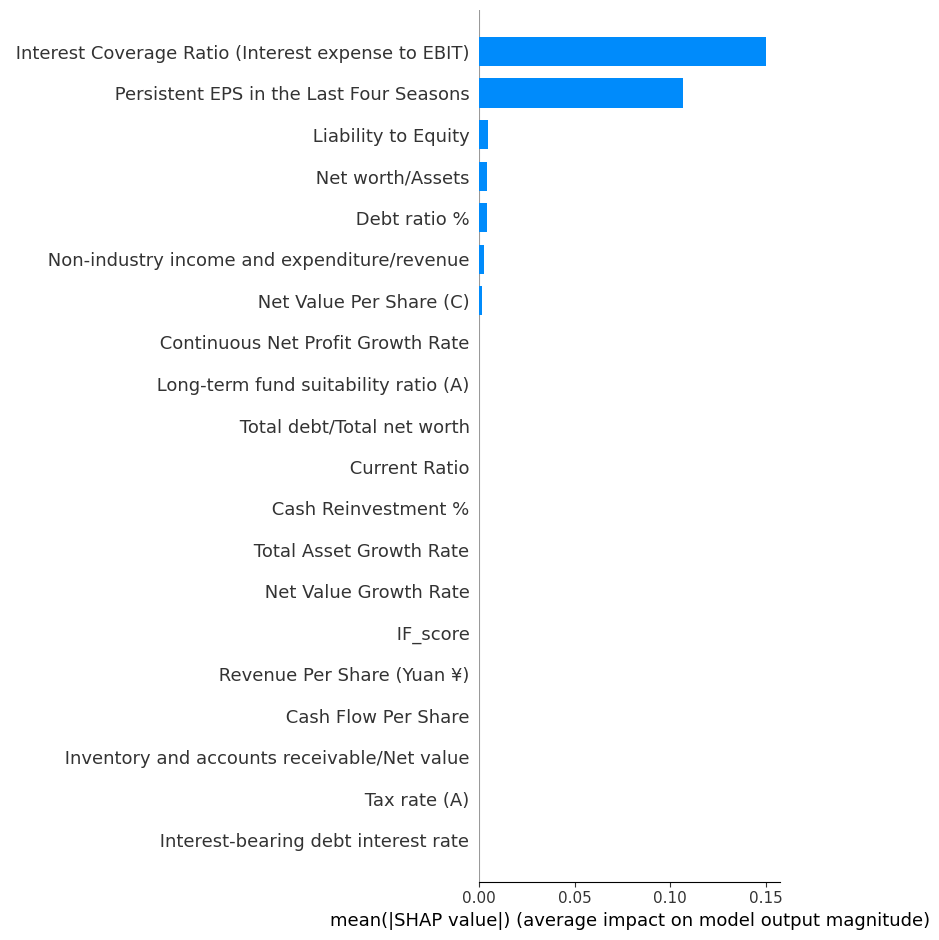

In [200]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=Pal_df1.columns)
PAL_shap_values = explainer.shap_values(Pal_df1, check_additivity=False)
shap.summary_plot(PAL_shap_values, Pal_df1.columns, plot_type='bar')

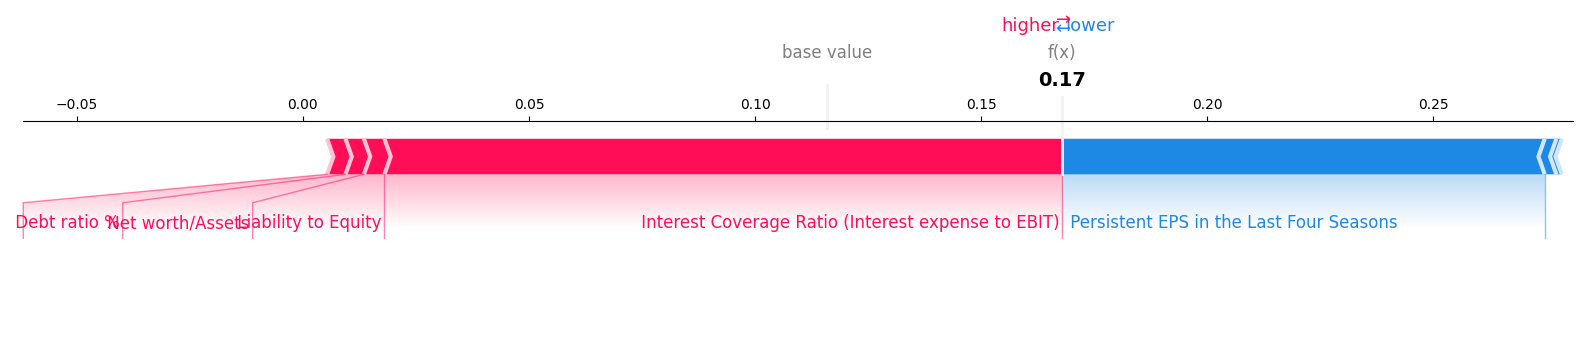

In [202]:
shap.force_plot(explainer.expected_value, 
                PAL_shap_values[0], Pal_df1.columns, matplotlib=True)

### JFC

In [408]:
arr_JFC = PSE_data.values[1]
arr_JFC

array([5.53405e-01, 6.11662e-01, 3.03481e-01, 9.02000e+09, 5.74000e+09,
       4.83561e-01, 2.19000e-04, 1.60846e-01, 1.92491e-01, 2.22937e-01,
       1.04060e-02, 1.32337e+01, 1.08503e+01, 7.57430e+00, 6.28000e+09,
       3.82922e-01, 1.78330e-02, 2.65400e-03, 6.63910e-02, 9.33000e-01,
       5.16900e-03, 1.04898e-01, 3.95122e-01, 4.94750e-02, 9.41000e-04,
       3.09744e-01, 2.47984e-01, 3.94060e-02, 3.71409e-01, 4.53265e-01,
       7.34952e-01, 7.60000e-01, 1.26120e-02, 2.60000e-03, 5.94035e-01,
       6.70000e-01, 6.40000e-01, 4.60000e-01, 6.30000e-01, 3.10000e-01,
       0.00000e+00, 8.10000e-01, 6.10000e-01, 8.40000e-01, 2.70000e-01,
       5.60000e-01, 1.00000e+00, 5.30600e-02, 1.00000e+00])

In [409]:
JFC_scaled_data = scaler.fit_transform(arr_JFC.reshape(-1,1))
JFC_scaled_data

array([[6.13531042e-11],
       [6.78117517e-11],
       [3.36453437e-11],
       [1.00000000e+00],
       [6.36363636e-01],
       [5.36098670e-11],
       [2.42793792e-14],
       [1.78321508e-11],
       [2.13404656e-11],
       [2.47158537e-11],
       [1.15365854e-12],
       [1.46715078e-09],
       [1.20291574e-09],
       [8.39722838e-10],
       [6.96230599e-01],
       [4.24525499e-11],
       [1.97705100e-12],
       [2.94235033e-13],
       [7.36042129e-12],
       [1.03436807e-10],
       [5.73059867e-13],
       [1.16294900e-11],
       [4.38050998e-11],
       [5.48503326e-12],
       [1.04323725e-13],
       [3.43396896e-11],
       [2.74926829e-11],
       [4.36873614e-12],
       [4.11761641e-11],
       [5.02511086e-11],
       [8.14802661e-11],
       [8.42572062e-11],
       [1.39822616e-12],
       [2.88248337e-13],
       [6.58575388e-11],
       [7.42793792e-11],
       [7.09534368e-11],
       [5.09977827e-11],
       [6.98447894e-11],
       [3.43680710e-11],


In [410]:
JFC_df1 =  pd.DataFrame(JFC_scaled_data.T, columns=PSE_data.columns)
JFC_df1

ROA(C) before interest and depreciation before interest  \
0                                       6.135310e-11          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0             6.781175e-11                                  3.364534e-11   

    Operating Expense Rate   Research and development expense rate  \
0                      1.0                                0.636364   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0     5.360987e-11                          2.427938e-14   1.783215e-11   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  ...  \
0              2.134047e-11                              2.471585e-11  ...   

    Cash Flow to Equity   Liability-Assets Flag   Net Income to Total Assets  \
0          3.436807e-11                     0.0                 8.980044e-11   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0            6.762749e-11                         9.312639e-11   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0          2.993348e-11                                       6.208426e-11     

    Net Income Flag   Equity to Liability      IF_score  
0      1.108647e-10          5.882483e-12  1.108647e-10  

[1 rows x 49 columns]

In [411]:
model.predict(JFC_df1.loc[[0]])

array([1], dtype=int64)

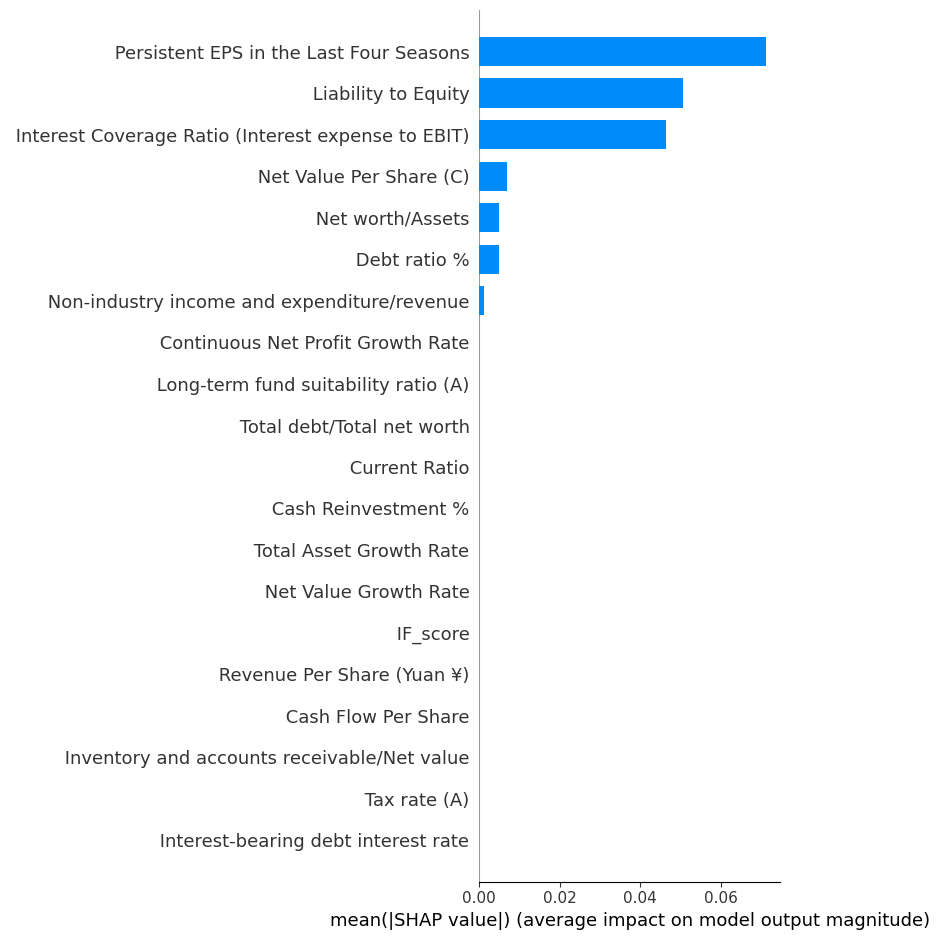

In [208]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=JFC_df1.columns)
JFC_shap_values = explainer.shap_values(JFC_df1, check_additivity=False)
shap.summary_plot(JFC_shap_values, JFC_df1.columns, plot_type='bar')

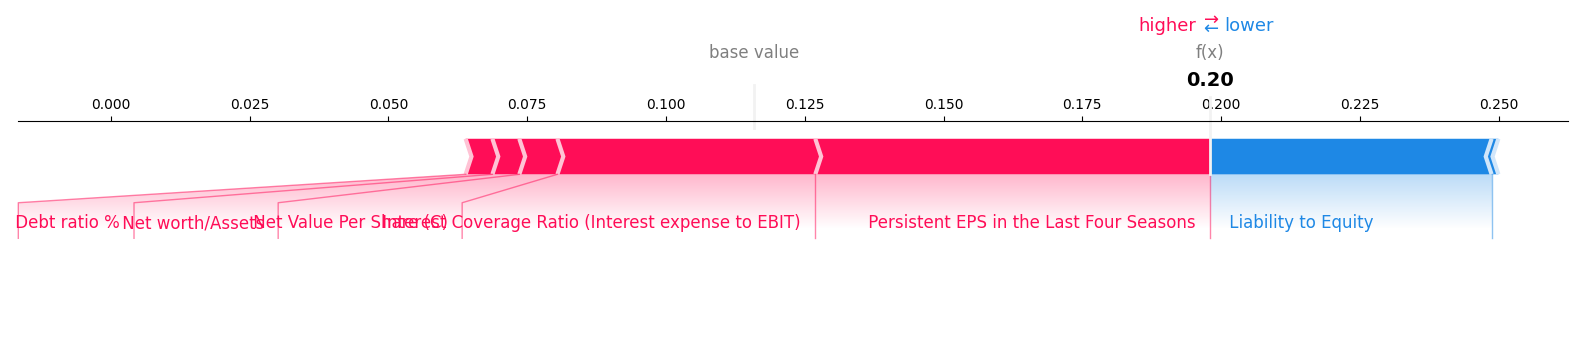

In [209]:
shap.force_plot(explainer.expected_value, 
                JFC_shap_values[0], JFC_df1.columns, matplotlib=True)

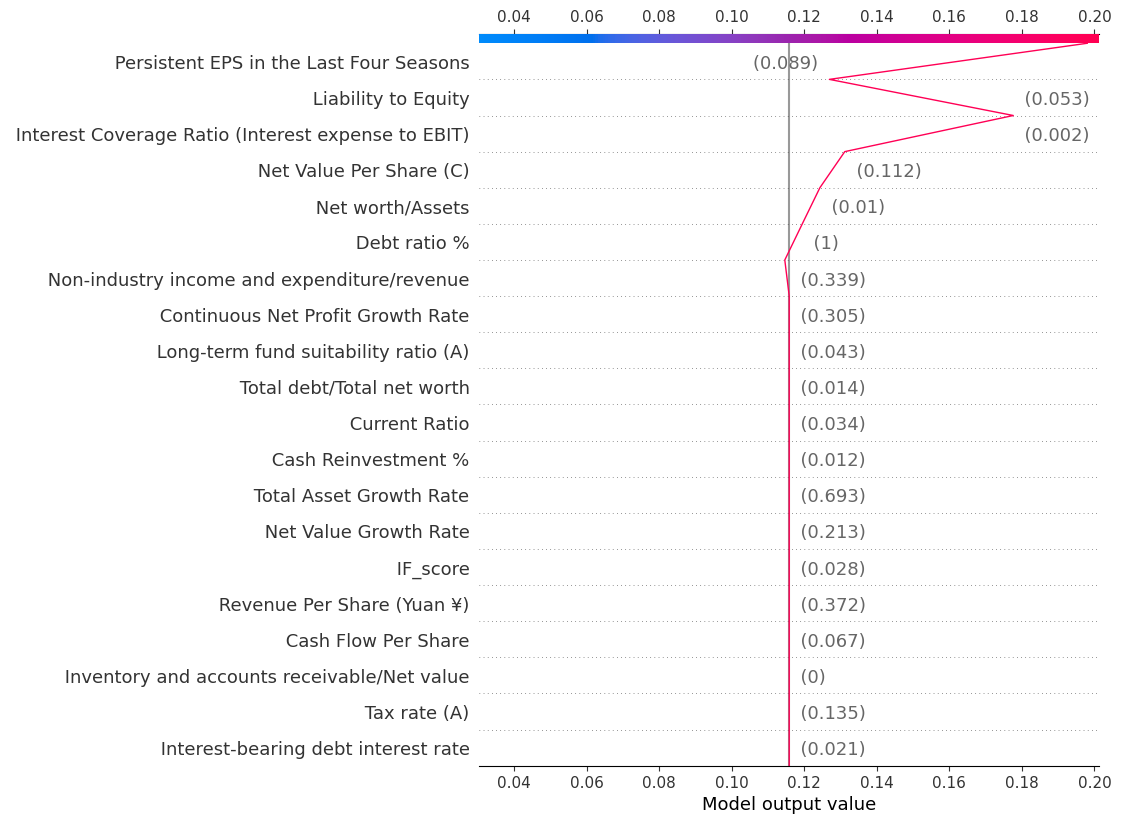

In [210]:
shap.decision_plot(explainer.expected_value, JFC_shap_values[0], JFC_df1, show=False)

### Shap Values

In [126]:
shap_vals = shap_values[0]

feature_importance = pd.DataFrame(list(zip(scaled_df.columns, shap_vals)),
                                  columns=['column_value', 'shap_vals'])

feature_importance.sort_values(by=['shap_vals'], 
                               ascending=False, 
                               inplace=True)

feature_importance

column_value  shap_vals
9             Persistent EPS in the Last Four Seasons   0.087114
45   Interest Coverage Ratio (Interest expense to ...   0.046116
44                                Liability to Equity   0.012329
19                                   Net worth/Assets   0.012170
18                                       Debt ratio %   0.012113
0    ROA(C) before interest and depreciation befor...   0.000000
35                                 Cash Flow to Sales   0.000000
28                       Operating Funds to Liability   0.000000
29                      Current Liabilities/Liability   0.000000
30                             Working Capital/Equity   0.000000
31                         Current Liabilities/Equity   0.000000
32              Long-term Liability to Current Assets   0.000000
33                         Total income/Total expense   0.000000
34                      Working capital Turnover Rate   0.000000
37                             Cash Flow to Liability   0.000000
36                          Cash Flow to Total Assets   0.000000
26                                  Cash/Total Assets   0.000000
38                                      CFO to Assets   0.000000
39                                Cash Flow to Equity   0.000000
40                              Liability-Assets Flag   0.000000
41                         Net Income to Total Assets   0.000000
42                              Gross Profit to Sales   0.000000
43                 Net Income to Stockholder's Equity   0.000000
46                                    Net Income Flag   0.000000
47                                Equity to Liability   0.000000
27                             Cash/Current Liability   0.000000
24                       Accounts Receivable Turnover   0.000000
25                        Current Assets/Total Assets   0.000000
13                              Net Value Growth Rate   0.000000
3                              Operating Expense Rate   0.000000
4               Research and development expense rate   0.000000
5                                      Cash flow rate   0.000000
6                 Interest-bearing debt interest rate   0.000000
7                                        Tax rate (A)   0.000000
10                                Cash Flow Per Share   0.000000
11                         Revenue Per Share (Yuan ¥)   0.000000
1                              Operating Gross Margin   0.000000
12                  Continuous Net Profit Growth Rate   0.000000
14                            Total Asset Growth Rate   0.000000
15                                Cash Reinvestment %   0.000000
16                                      Current Ratio   0.000000
17                         Total debt/Total net worth   0.000000
20               Long-term fund suitability ratio (A)   0.000000
21                   Operating profit/Paid-in capital   0.000000
22        Inventory and accounts receivable/Net value   0.000000
23                               Total Asset Turnover   0.000000
48                                           IF_score   0.000000
2         Non-industry income and expenditure/revenue  -0.001219
8                             Net Value Per Share (C)  -0.002301

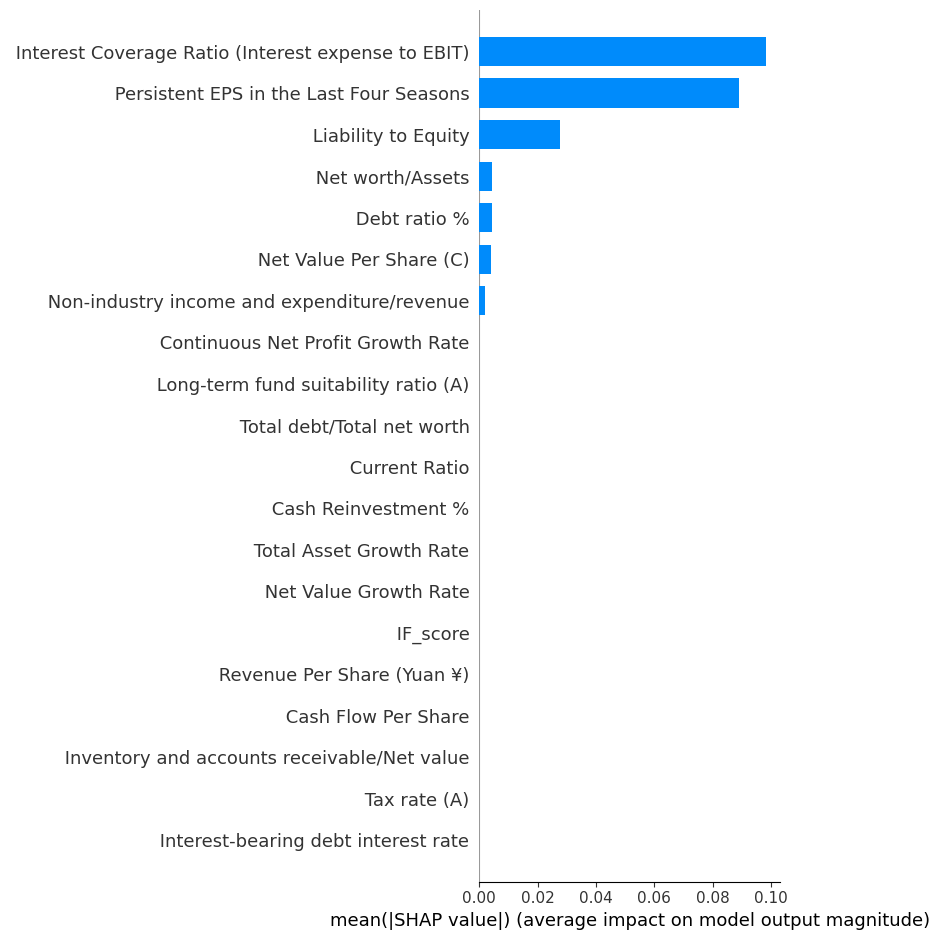

In [250]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=scaled_df.columns)
shap_values = explainer.shap_values(scaled_df, check_additivity=False)
shap.summary_plot(shap_values, scaled_df.columns, plot_type='bar')

### Forceplot

In [128]:
model.predict(scaled_df.loc[[1]])

array([1], dtype=int64)

In [129]:
model.predict(scaled_df.loc[[0]])

array([1], dtype=int64)

### PAL

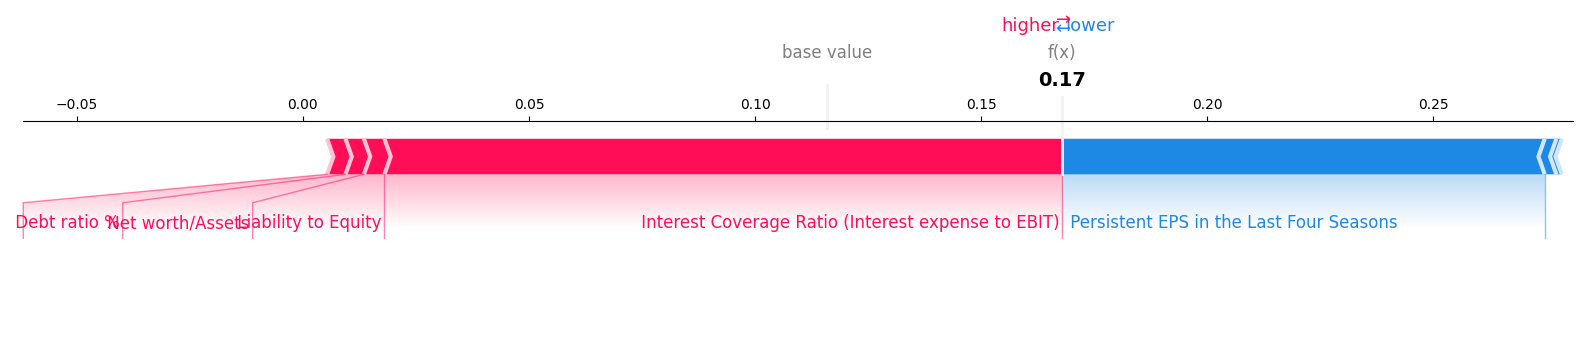

In [130]:
#WithScaling
shap.force_plot(explainer.expected_value, 
                shap_values[0], scaled_df.columns, matplotlib=True)

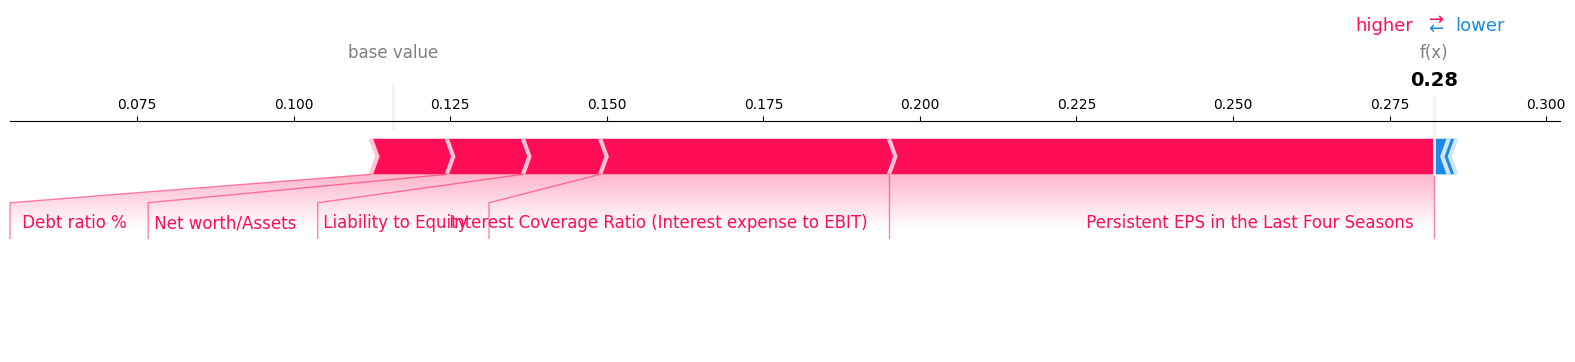

In [60]:
#Without Scaling
shap.force_plot(explainer.expected_value, 
                shap_values[0], X_holdout.columns, matplotlib=True)

### JFC

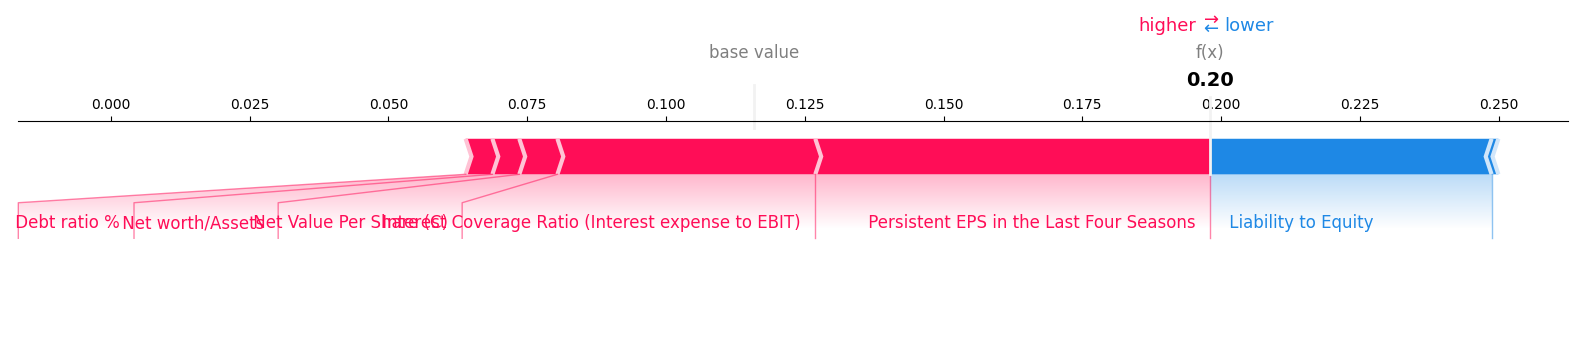

In [132]:
#WithScaling
shap.force_plot(explainer.expected_value, 
                shap_values[1], scaled_df.columns, matplotlib=True)

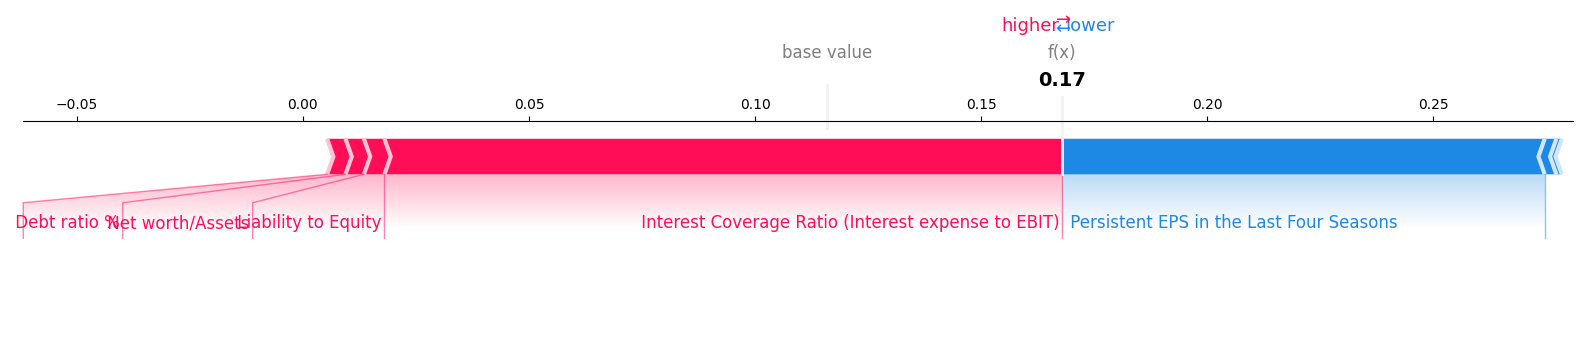

In [62]:
#Without Scaling
shap.force_plot(explainer.expected_value, 
                shap_values[1], X_holdout.columns, matplotlib=True)

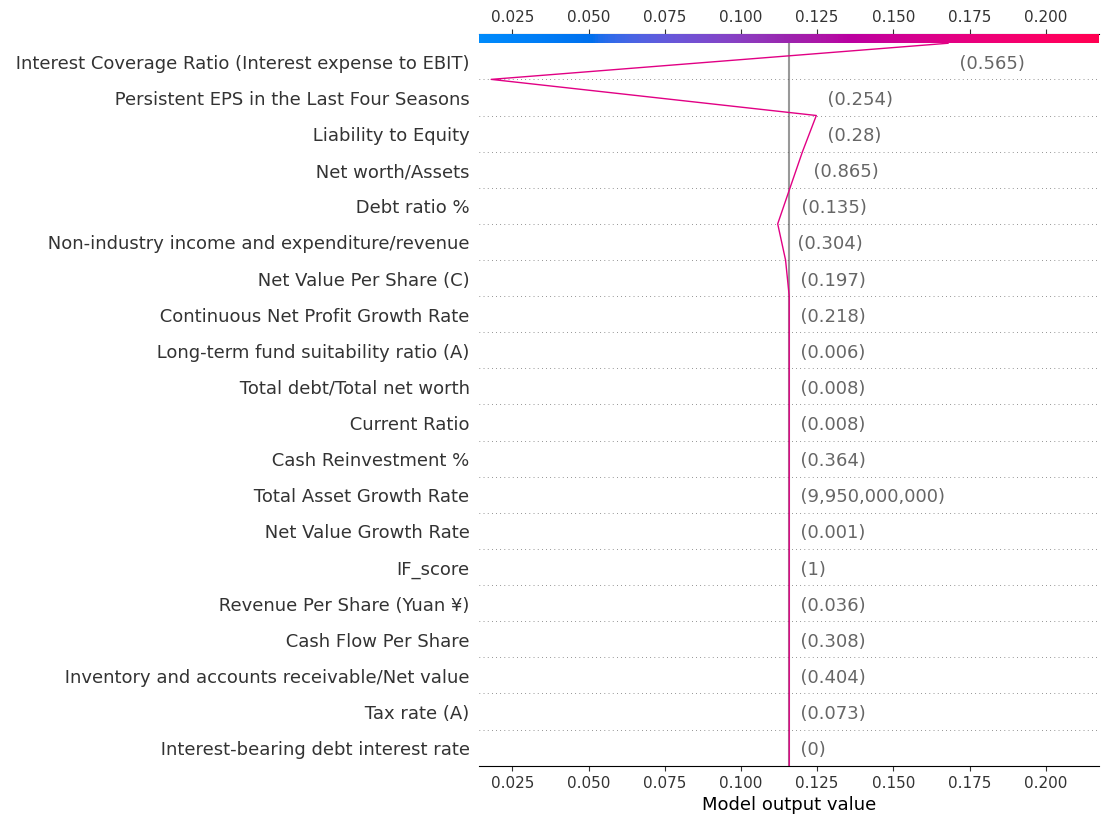

In [63]:
shap.decision_plot(explainer.expected_value, shap_values[1], X_holdout, show=False)

## Predictions (JFC and PAL)

### JFC

In [609]:
data = [
    [0.1494, 0.3950, 12.0368, 0.0380, 0.0071, 3.3500, 0.7448,  4.8152,
     3.9960, 3.1672, 2.3901, 13.2337, 10.8503, 7.5743, 24.6228, 0.4243, 1.2200, 
     0.4918, 35.5500, 0.3467, 1.5276, 2.5869, 0.0098, 1.9433, 0.0015, 0.3207, 0.0009,
     0.0035, 0.0877, 0.4033, 0.1652, 0.7600, 0.0038, 1.0605, 16.2749, 2.2071, 0.9078, 
     3.4457, 2.8304, 2.6186, 0, 0.0479, 3.3033, 0.1383, 1.8845, 0.566, 1, 0.5306, 1]
]

- The only problem is the "Interest Coverage Ratio (Interest expense to EBIT)" it needs to be 0.565 or above

In [610]:
len(data)

1

In [581]:
JFC = pd.DataFrame(data, columns = PSE_data.columns)

In [582]:
JFC.style

In [583]:
model.predict(JFC.loc[[0]])

array([0], dtype=int64)

In [584]:
sample = JFC.reset_index()
sample[sample['index'] == 0]

index   ROA(C) before interest and depreciation before interest  \
0      0                                             0.1494          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                    0.395                                       12.0368   

    Operating Expense Rate   Research and development expense rate  \
0                    0.038                                  0.0071   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0             3.35                                0.7448         4.8152   

    Net Value Per Share (C)  ...   Cash Flow to Equity  \
0                     3.996  ...                2.6186   

    Liability-Assets Flag   Net Income to Total Assets  \
0                       0                       0.0479   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                  3.3033                               0.1383   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0                1.8845                                              0.566     

    Net Income Flag   Equity to Liability   IF_score  
0                 1                0.5306          1  

[1 rows x 50 columns]

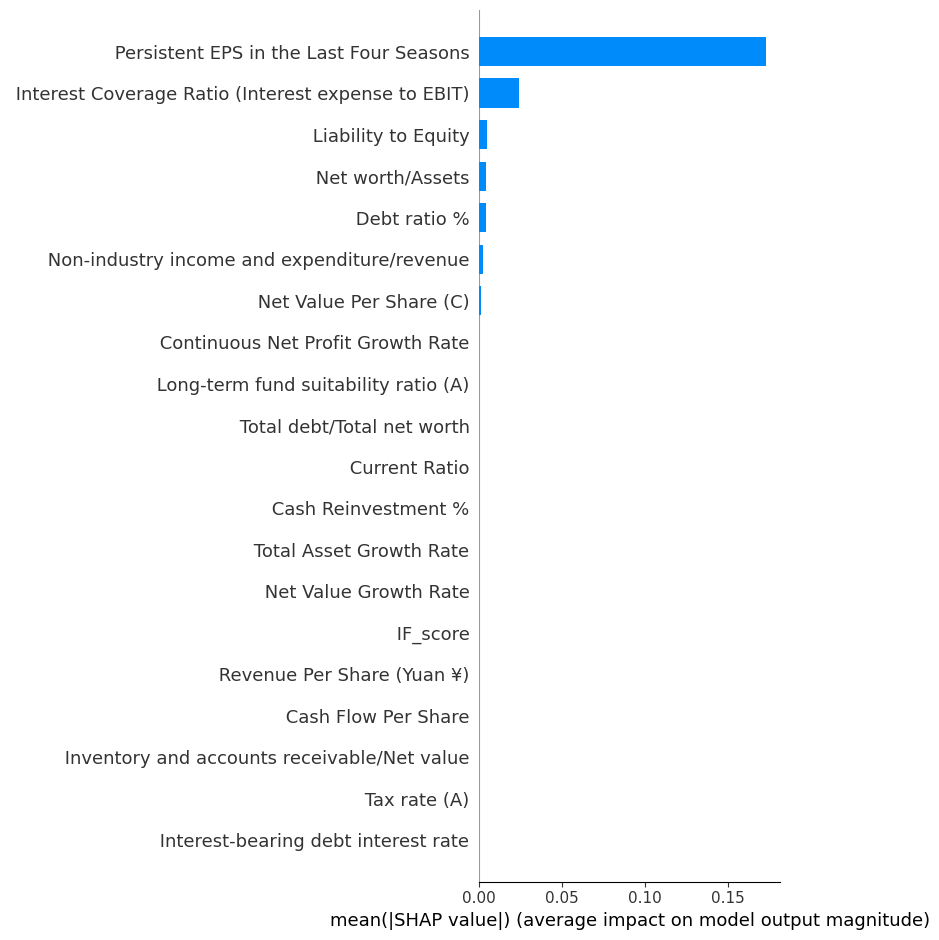

In [588]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=JFC.columns)
JFC_shap_values = explainer.shap_values(JFC, check_additivity=False)
shap.summary_plot(JFC_shap_values, JFC.columns, plot_type='bar')

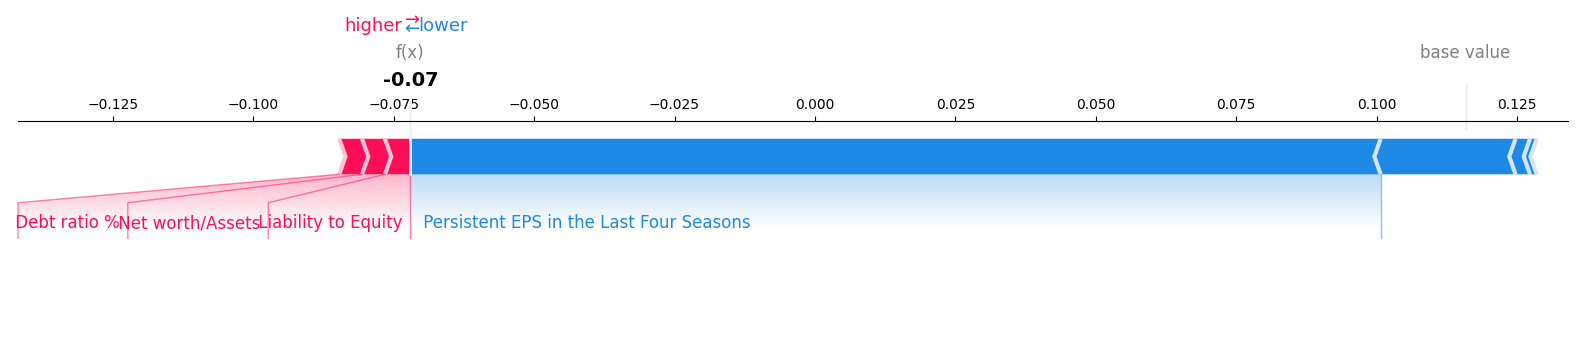

In [589]:
shap.force_plot(explainer.expected_value, 
                JFC_shap_values[0], JFC.columns, matplotlib=True)

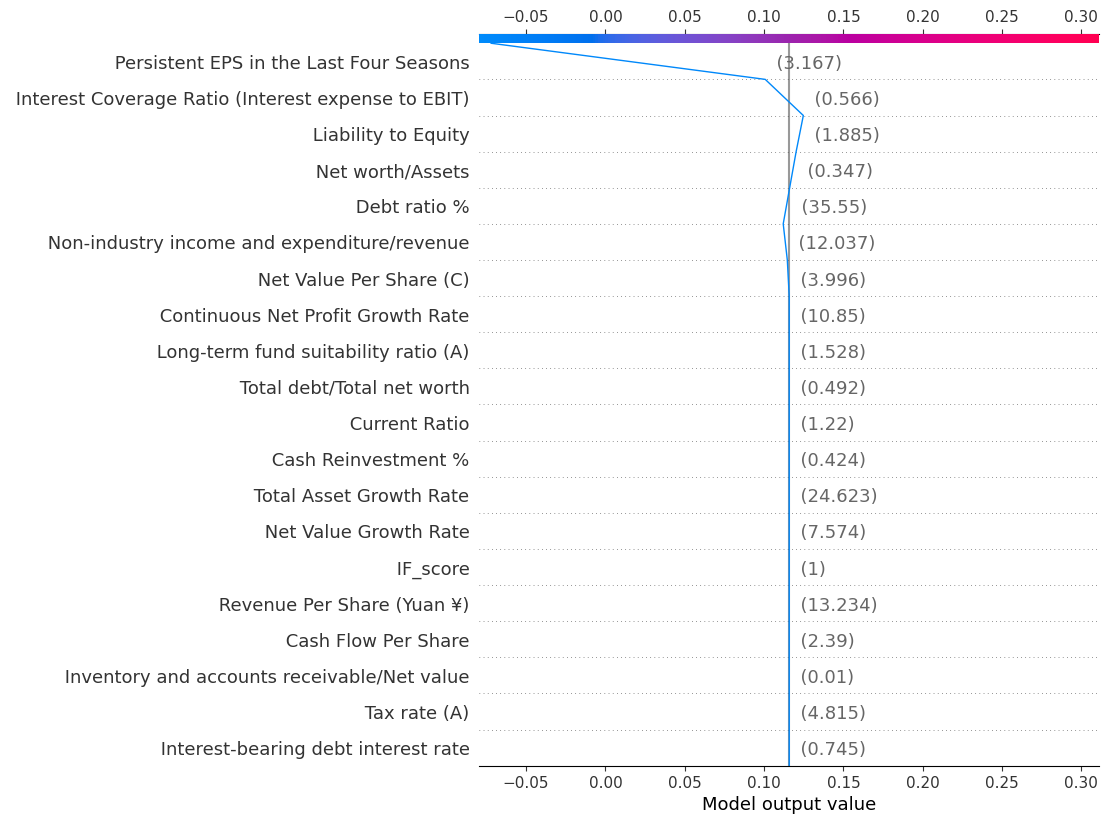

In [591]:
shap.decision_plot(explainer.expected_value, JFC_shap_values[0], JFC, show=False)

### PAL

In [611]:
PAL = [[-0.0352, 0.9869, 1.0189, 3.9399, 0.0000, 0.0200, 0.3236, 33.2765, 2.1530, -0.5150, 2.6831, 0.5034, 5.1864,
       1.0132, 1.5955, 1.3518, 0.4700, 42.7374, 0.6589, 0.0154, 0.0150, -0.6874, 11.8074, 0.0493, -47.0064, 0.0289,
       0.0000, 0.0008, 1.7084, 0.0294, 0.3679, 0.2153, 1.8995, 0.0446, 1.5328, 0.3240, -0.0394, -2.3281, -1.3627, 
       -0.5013, 0.0000, 0.0067, -0.0002, -0.4480, 12.5182, -30.3682, 1.0000, 0.0799, 1]]


In [612]:
len(PAL)

1

In [614]:
PAL = pd.DataFrame(PAL, columns = PSE_data.columns)
PAL.style

In [615]:
model.predict(PAL.loc[[0]])

array([1], dtype=int64)

In [616]:
sample = PAL.reset_index()
sample[sample['index'] == 0]

index   ROA(C) before interest and depreciation before interest  \
0      0                                            -0.0352          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                   0.9869                                        1.0189   

    Operating Expense Rate   Research and development expense rate  \
0                   3.9399                                     0.0   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0             0.02                                0.3236        33.2765   

    Net Value Per Share (C)  ...   Cash Flow to Equity  \
0                     2.153  ...               -0.5013   

    Liability-Assets Flag   Net Income to Total Assets  \
0                     0.0                       0.0067   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                 -0.0002                               -0.448   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0               12.5182                                           -30.3682     

    Net Income Flag   Equity to Liability   IF_score  
0               1.0                0.0799          1  

[1 rows x 50 columns]

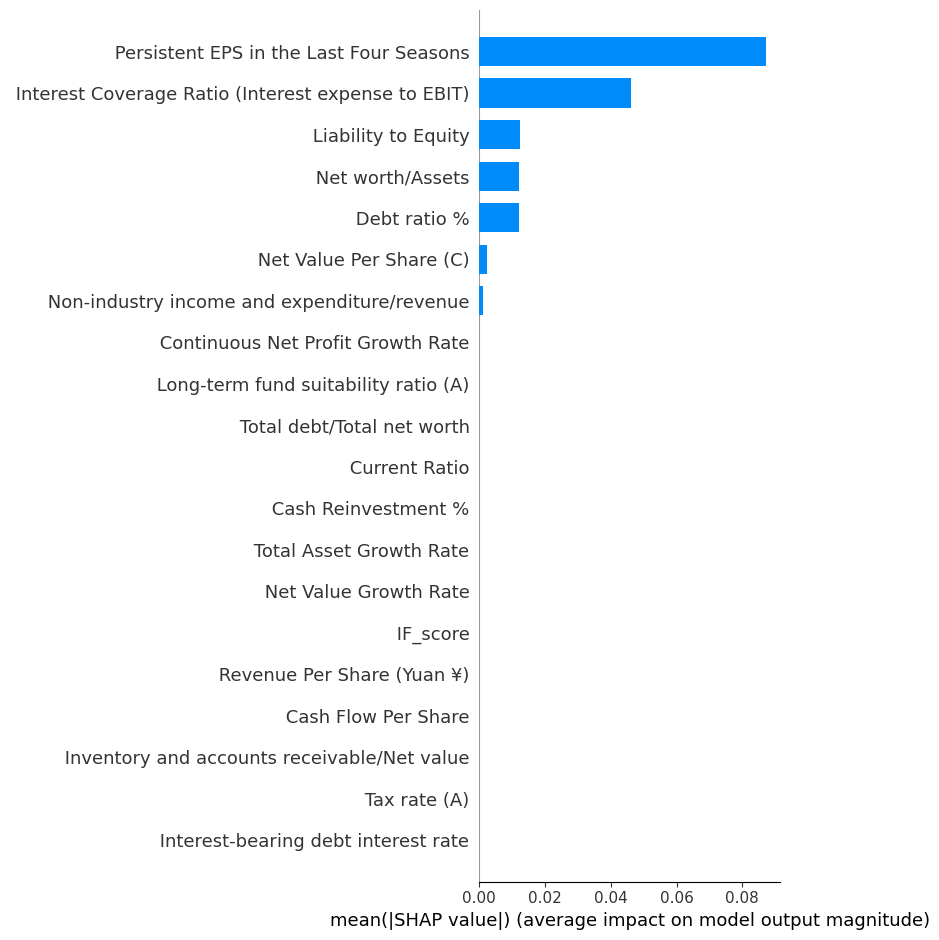

In [618]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=PAL.columns)
PAL_shap_values = explainer.shap_values(PAL, check_additivity=False)
shap.summary_plot(PAL_shap_values, PAL.columns, plot_type='bar')

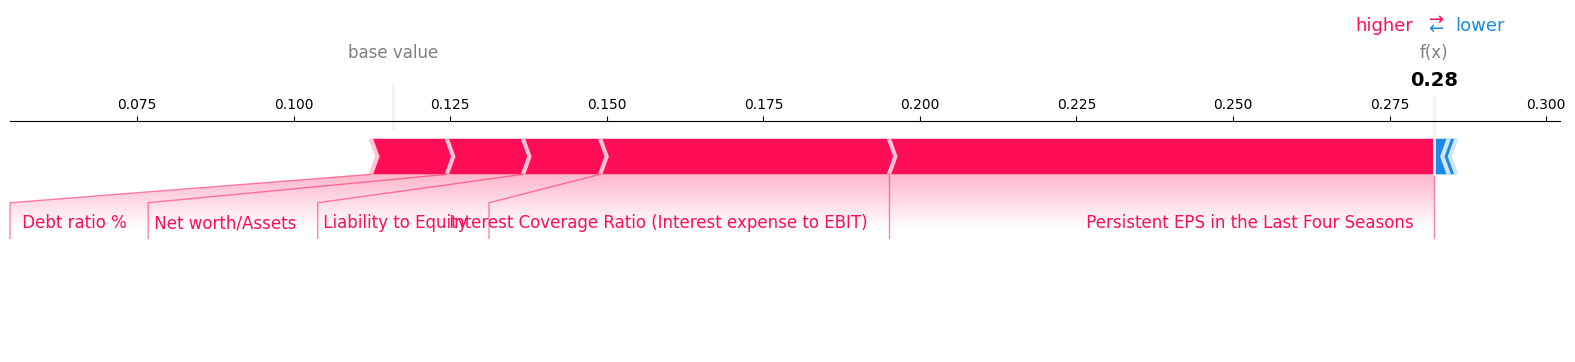

In [620]:
shap.force_plot(explainer.expected_value, 
                PAL_shap_values[0], PAL.columns, matplotlib=True)

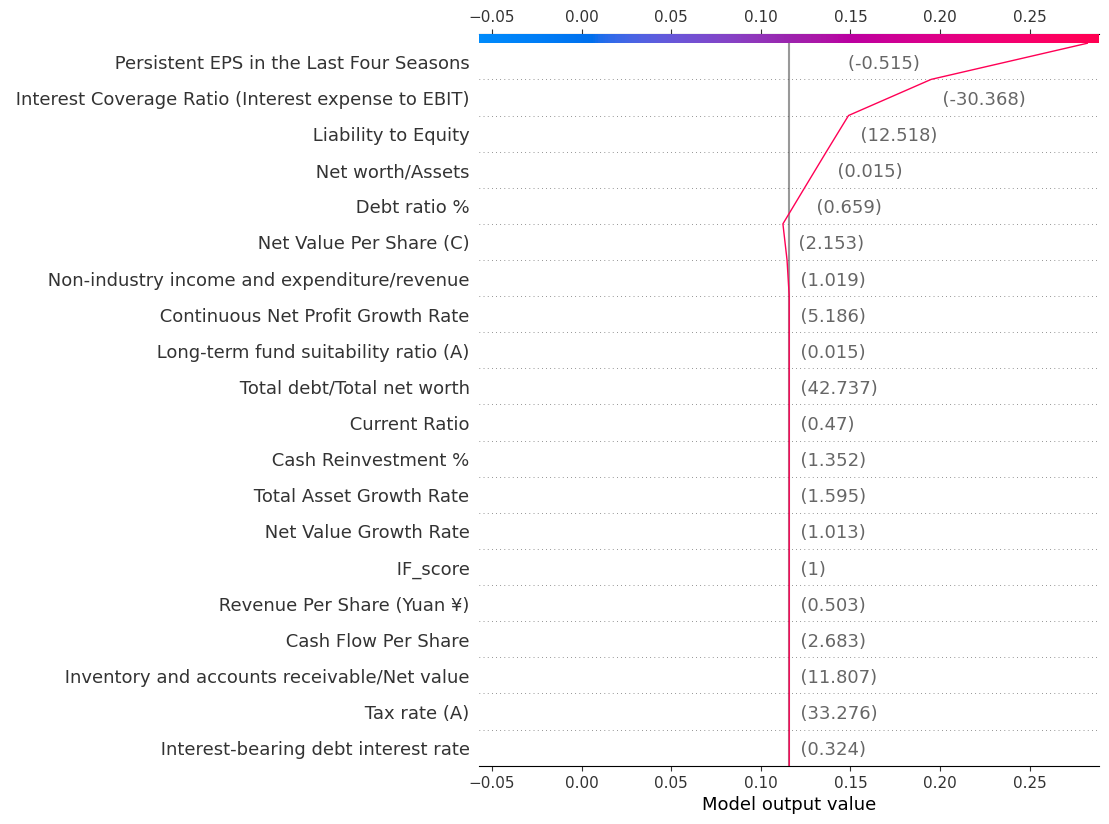

In [621]:
shap.decision_plot(explainer.expected_value, PAL_shap_values[0], PAL, show=False)

### ABS CBN

In [624]:
ABSCBN = [[-0.6679, 0.0655, -1.1752, 0.9212, 0.0099, -10.5700, 0.0784, 0.0116, 0.0207, -16.1287,
          0.0021, 0.0260, 1.2262, 2.4083, 0.7436, -0.0933, 0.6600, 1.5993, 0.8800, 0.5914, 
          0.3786, 0.1297, -0.4499, -2.1084, -0.3561, 0.3171, -0.1996, -0.4142, -0.4035, 
          1.1795, 1.0863, 1.6512, 0.2729, 1.6984, -2.2045, 0.0659, 0.3434, 0.7125, 1.0831, 
          1.1765, 1.0000, -0.2118, -1.7165, -0.7255, 1.4000, -79.1957, 0.0000, 0.7143, 1]]

In [625]:
ABSCBN = pd.DataFrame(ABSCBN, columns = PSE_data.columns)

In [626]:
ABSCBN.style

In [627]:
model.predict(ABSCBN.loc[[0]])

array([1], dtype=int64)

In [628]:
sample = ABSCBN.reset_index()
sample[sample['index'] == 0]

index   ROA(C) before interest and depreciation before interest  \
0      0                                            -0.6679          

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                   0.0655                                       -1.1752   

    Operating Expense Rate   Research and development expense rate  \
0                   0.9212                                  0.0099   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0           -10.57                                0.0784         0.0116   

    Net Value Per Share (C)  ...   Cash Flow to Equity  \
0                    0.0207  ...                1.1765   

    Liability-Assets Flag   Net Income to Total Assets  \
0                     1.0                      -0.2118   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                 -1.7165                              -0.7255   

    Liability to Equity   Interest Coverage Ratio (Interest expense to EBIT)  \
0                   1.4                                           -79.1957     

    Net Income Flag   Equity to Liability   IF_score  
0               0.0                0.7143          1  

[1 rows x 50 columns]

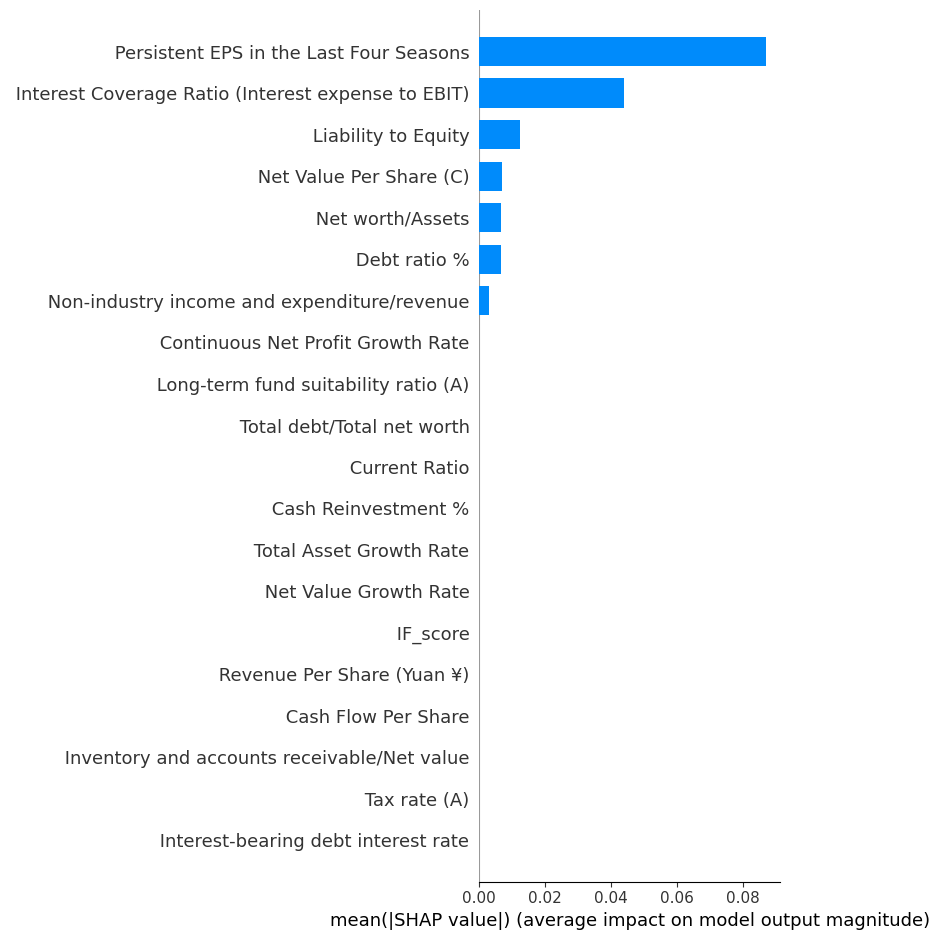

In [629]:
model = rh['gradientboostingclassifier']
explainer = shap.TreeExplainer(model, feature_names=ABSCBN.columns)
ABSCBN_shap_values = explainer.shap_values(ABSCBN, check_additivity=False)
shap.summary_plot(ABSCBN_shap_values, ABSCBN.columns, plot_type='bar')

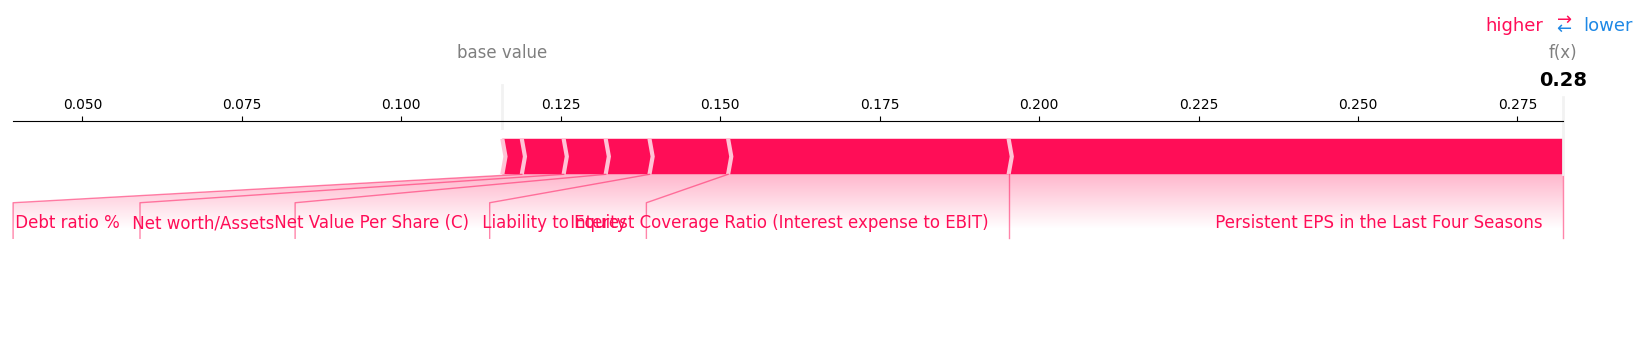

In [630]:
shap.force_plot(explainer.expected_value, 
                ABSCBN_shap_values[0], ABSCBN.columns, matplotlib=True)

## Streamlit

In [653]:
PSE = pd.concat([PAL, JFC, ABSCBN], axis = 0)
PSE.set_index(pd.Index(['PAL','JFC','ABSCBN']),inplace = True)


In [654]:
PSE

ROA(C) before interest and depreciation before interest  \
PAL                                               -0.0352          
JFC                                                0.1494          
ABSCBN                                            -0.6679          

         Operating Gross Margin   Non-industry income and expenditure/revenue  \
PAL                      0.9869                                        1.0189   
JFC                      0.3950                                       12.0368   
ABSCBN                   0.0655                                       -1.1752   

         Operating Expense Rate   Research and development expense rate  \
PAL                      3.9399                                  0.0000   
JFC                      0.0380                                  0.0071   
ABSCBN                   0.9212                                  0.0099   

         Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
PAL                0.02                                0.3236        33.2765   
JFC                3.35                                0.7448         4.8152   
ABSCBN           -10.57                                0.0784         0.0116   

         Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
PAL                       2.1530                                   -0.5150   
JFC                       3.9960                                    3.1672   
ABSCBN                    0.0207                                  -16.1287   

        ...   Cash Flow to Equity   Liability-Assets Flag  \
PAL     ...               -0.5013                     0.0   
JFC     ...                2.6186                     0.0   
ABSCBN  ...                1.1765                     1.0   

         Net Income to Total Assets   Gross Profit to Sales  \
PAL                          0.0067                 -0.0002   
JFC                          0.0479                  3.3033   
ABSCBN                      -0.2118                 -1.7165   

         Net Income to Stockholder's Equity   Liability to Equity  \
PAL                                 -0.4480               12.5182   
JFC                                  0.1383                1.8845   
ABSCBN                              -0.7255                1.4000   

         Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
PAL                                              -30.3682                 1.0   
JFC                                                0.5660                 1.0   
ABSCBN                                           -79.1957                 0.0   

         Equity to Liability   IF_score  
PAL                   0.0799          1  
JFC                   0.5306          1  
ABSCBN                0.7143          1  

[3 rows x 49 columns]

In [655]:
PSE.to_csv('PSE.csv')

In [639]:
model = rh['gradientboostingclassifier']
pickle.dump(model, open('gb_tk.pkl', 'wb'))

In [658]:
PSE1 = pd.read_csv('PSE.csv',index_col = 0)
PSE1

ROA(C) before interest and depreciation before interest  \
PAL                                               -0.0352          
JFC                                                0.1494          
ABSCBN                                            -0.6679          

         Operating Gross Margin   Non-industry income and expenditure/revenue  \
PAL                      0.9869                                        1.0189   
JFC                      0.3950                                       12.0368   
ABSCBN                   0.0655                                       -1.1752   

         Operating Expense Rate   Research and development expense rate  \
PAL                      3.9399                                  0.0000   
JFC                      0.0380                                  0.0071   
ABSCBN                   0.9212                                  0.0099   

         Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
PAL                0.02                                0.3236        33.2765   
JFC                3.35                                0.7448         4.8152   
ABSCBN           -10.57                                0.0784         0.0116   

         Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
PAL                       2.1530                                   -0.5150   
JFC                       3.9960                                    3.1672   
ABSCBN                    0.0207                                  -16.1287   

        ...   Cash Flow to Equity   Liability-Assets Flag  \
PAL     ...               -0.5013                     0.0   
JFC     ...                2.6186                     0.0   
ABSCBN  ...                1.1765                     1.0   

         Net Income to Total Assets   Gross Profit to Sales  \
PAL                          0.0067                 -0.0002   
JFC                          0.0479                  3.3033   
ABSCBN                      -0.2118                 -1.7165   

         Net Income to Stockholder's Equity   Liability to Equity  \
PAL                                 -0.4480               12.5182   
JFC                                  0.1383                1.8845   
ABSCBN                              -0.7255                1.4000   

         Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
PAL                                              -30.3682                 1.0   
JFC                                                0.5660                 1.0   
ABSCBN                                           -79.1957                 0.0   

         Equity to Liability   IF_score  
PAL                   0.0799          1  
JFC                   0.5306          1  
ABSCBN                0.7143          1  

[3 rows x 49 columns]

In [659]:
PSE_transactions = PSE1.index.to_list()

PSE_transactions

['PAL', 'JFC', 'ABSCBN']

In [650]:
test['level_1']

0    0
1    0
2    0
Name: level_1, dtype: int64

In [641]:
PSE.index.to_list()

[('PAL', 0), ('JFC', 0), ('ABSCBN', 0)]